## Load file and check information

In [1]:
OverseasTrips <- read.csv('OverseasTrips.csv')

In [2]:
print(head(OverseasTrips))
print(tail(OverseasTrips))

  ï..Quarter Trips.Thousands.
1     2012Q1           1165.1
2     2012Q2           1817.3
3     2012Q3           2096.7
4     2012Q4           1438.0
5     2013Q1           1251.7
6     2013Q2           1893.0
   ï..Quarter Trips.Thousands.
27     2018Q3           3330.9
28     2018Q4           2412.8
29     2019Q1           2026.7
30     2019Q2           3021.8
31     2019Q3           3334.4
32     2019Q4           2424.6


In [3]:
class(OverseasTrips)

[1] "data.frame"

In [4]:
str(OverseasTrips)


'data.frame':	32 obs. of  2 variables:
 $ ï..Quarter      : chr  "2012Q1" "2012Q2" "2012Q3" "2012Q4" ...
 $ Trips.Thousands.: num  1165 1817 2097 1438 1252 ...


In [5]:
OverseasTrips$ï..Quarter

[1] "2012Q1" "2012Q2" "2012Q3" "2012Q4" "2013Q1" "2013Q2" "2013Q3" "2013Q4"
 [9] "2014Q1" "2014Q2" "2014Q3" "2014Q4" "2015Q1" "2015Q2" "2015Q3" "2015Q4"
[17] "2016Q1" "2016Q2" "2016Q3" "2016Q4" "2017Q1" "2017Q2" "2017Q3" "2017Q4"
[25] "2018Q1" "2018Q2" "2018Q3" "2018Q4" "2019Q1" "2019Q2" "2019Q3" "2019Q4"

In [6]:
names(OverseasTrips)[1] <- "Quarter"

In [7]:
str(OverseasTrips)

'data.frame':	32 obs. of  2 variables:
 $ Quarter         : chr  "2012Q1" "2012Q2" "2012Q3" "2012Q4" ...
 $ Trips.Thousands.: num  1165 1817 2097 1438 1252 ...


In [8]:
str(NewHousesReg)

ERROR: Error in str(NewHousesReg): object 'NewHousesReg' not found


In [9]:

is.ts(OverseasTrips)

[1] FALSE

## Create time series variables

In [34]:
library('tseries')


In [10]:
library('fpp2')
library('ggplot2')

Warning message:
"package 'fpp2' was built under R version 4.0.5"
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages ---------------------------------------------- fpp2 2.4 --

v ggplot2   3.3.3     v fma       2.4  
v forecast  8.14      v expsmooth 2.3  





In [11]:
trips <- ts(OverseasTrips[,2], start=c(2012,1), frequency=4)

In [12]:
frequency(trips)

[1] 4

In [13]:
start(trips)

[1] 2012    1

In [14]:
end(trips)

[1] 2019    4

In [15]:
cycle(trips)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,1,2,3,4
2013,1,2,3,4
2014,1,2,3,4
2015,1,2,3,4
2016,1,2,3,4
2017,1,2,3,4
2018,1,2,3,4
2019,1,2,3,4


In [16]:
floor(trips)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,1165,1817,2096,1438
2013,1251,1893,2261,1580
2014,1342,2126,2440,1694
2015,1531,2344,2770,1995
2016,1784,2598,3061,2139
2017,1796,2769,3095,2270
2018,1920,2951,3330,2412
2019,2026,3021,3334,2424


In [17]:
?floor

In [31]:
time(trips)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,2012.00,2012.25,2012.50,2012.75
2013,2013.00,2013.25,2013.50,2013.75
2014,2014.00,2014.25,2014.50,2014.75
2015,2015.00,2015.25,2015.50,2015.75
2016,2016.00,2016.25,2016.50,2016.75
2017,2017.00,2017.25,2017.50,2017.75
2018,2018.00,2018.25,2018.50,2018.75
2019,2019.00,2019.25,2019.50,2019.75


In [18]:
?time

In [19]:
# Technique that allows to aggregate values. Descriptive parameters

trips_agg <- aggregate(trips, FUN=mean)
trips_agg


A Time Series:
[1] 1629.275 1746.450 1901.100 2160.750 2396.075 2483.000 2654.075 2701.875

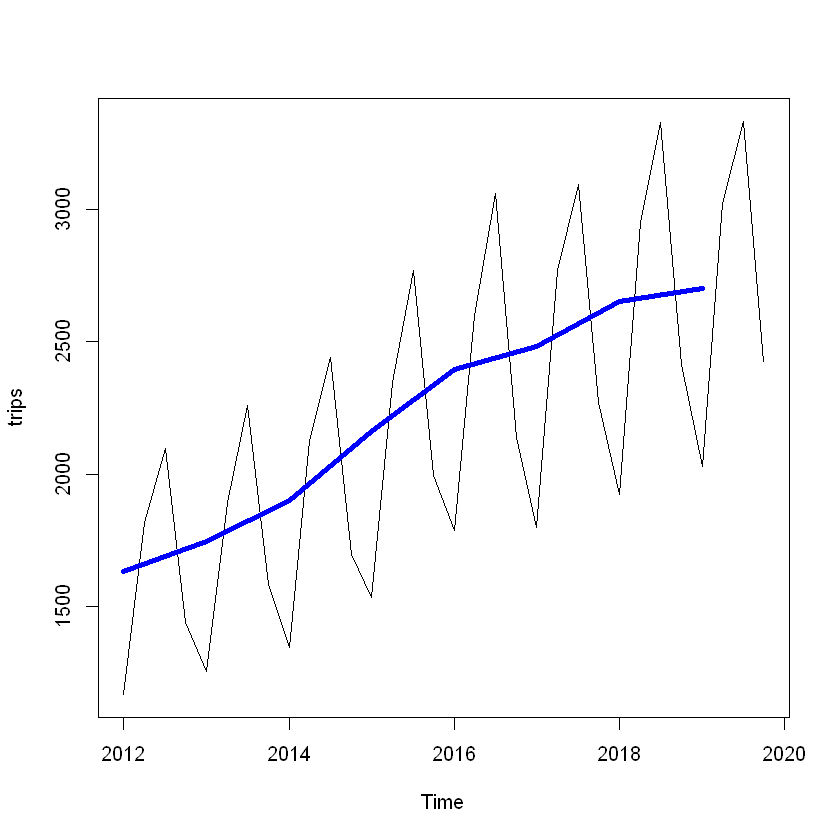

In [20]:

plot(trips)
lines(trips_agg, col='blue', lw=4)


In [21]:
# Watch out, aggregate function starts at the beguining but misses some data at the end
?aggregate

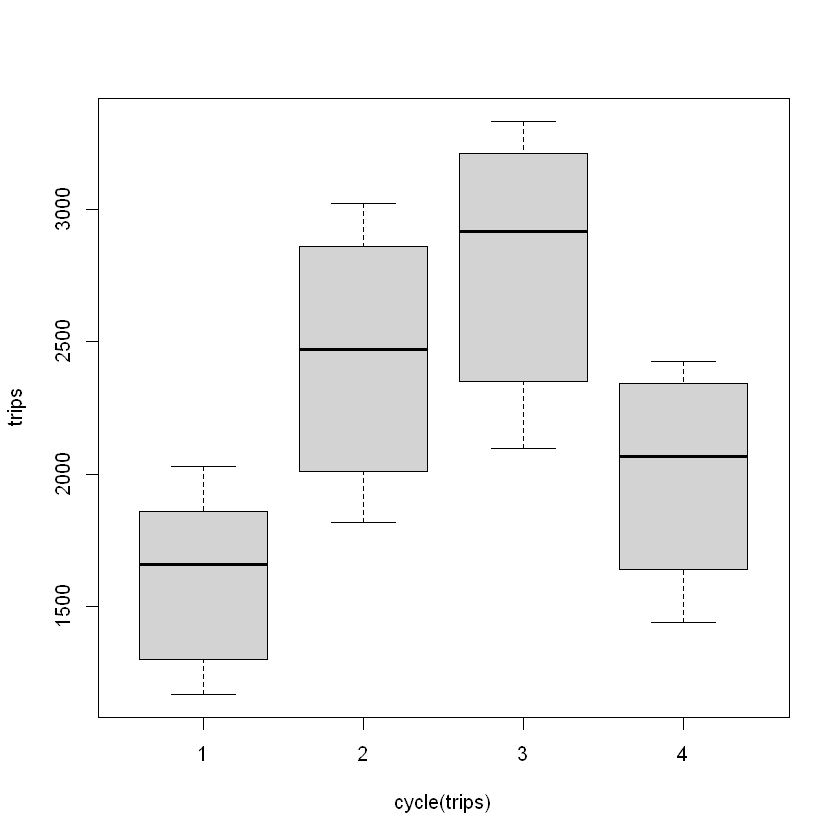

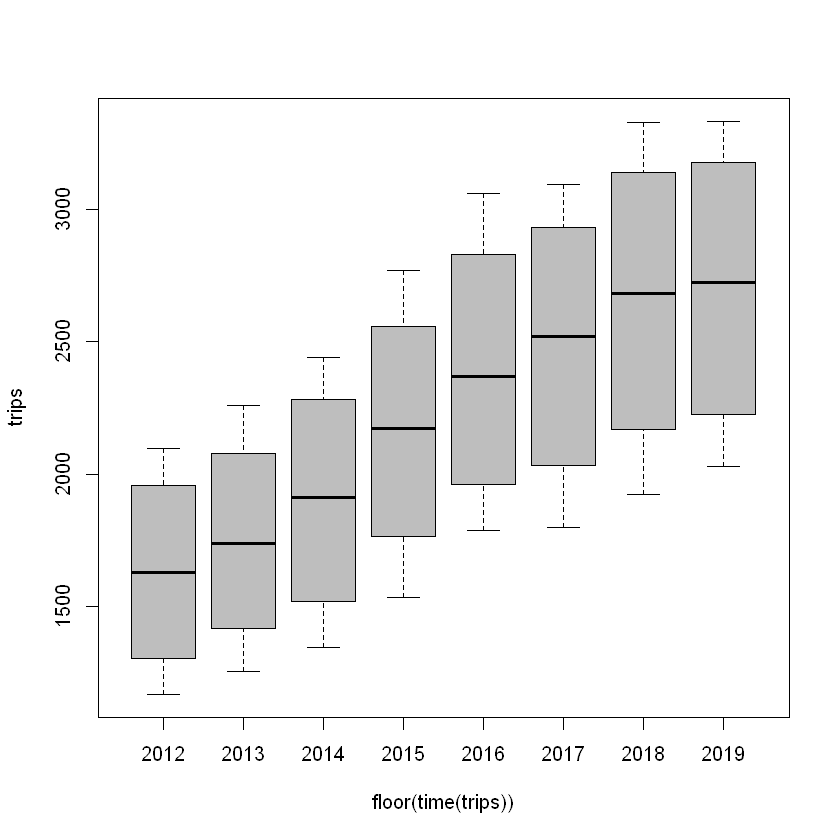

In [22]:
# Analyse in which particular quarter are more flights 

boxplot(trips ~ cycle(trips)) # Trips per quarter
boxplot(trips ~ floor(time(trips)), col='grey') # Trips per year

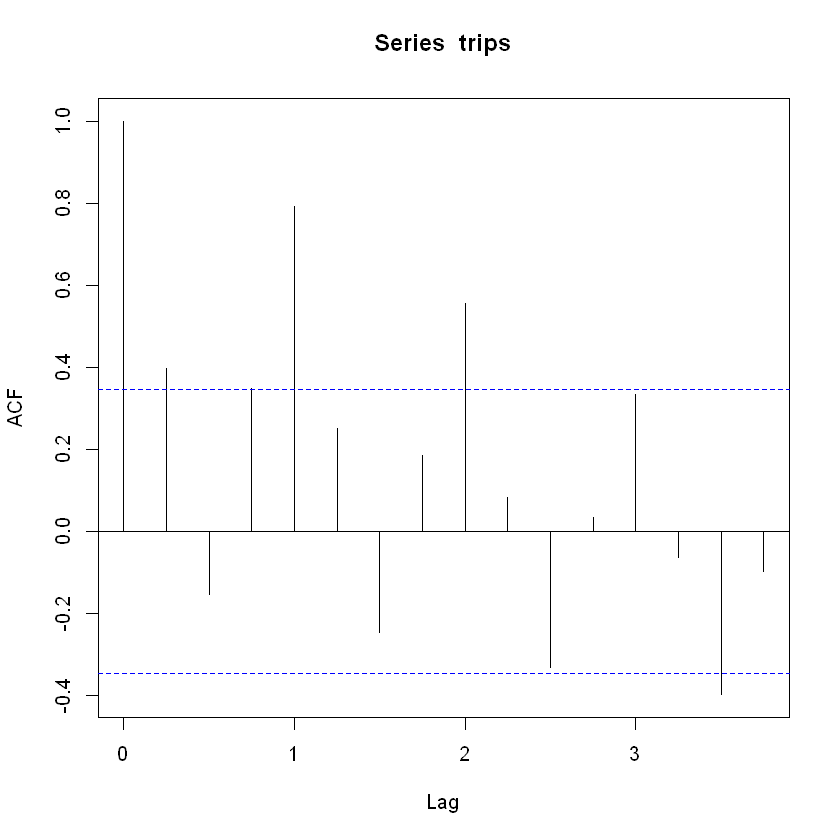

In [23]:
acf(trips)

In [25]:
library('forecast')

In [26]:
adf.test(trips, k=0)

ERROR: Error in adf.test(trips, k = 0): could not find function "adf.test"


## Linear model

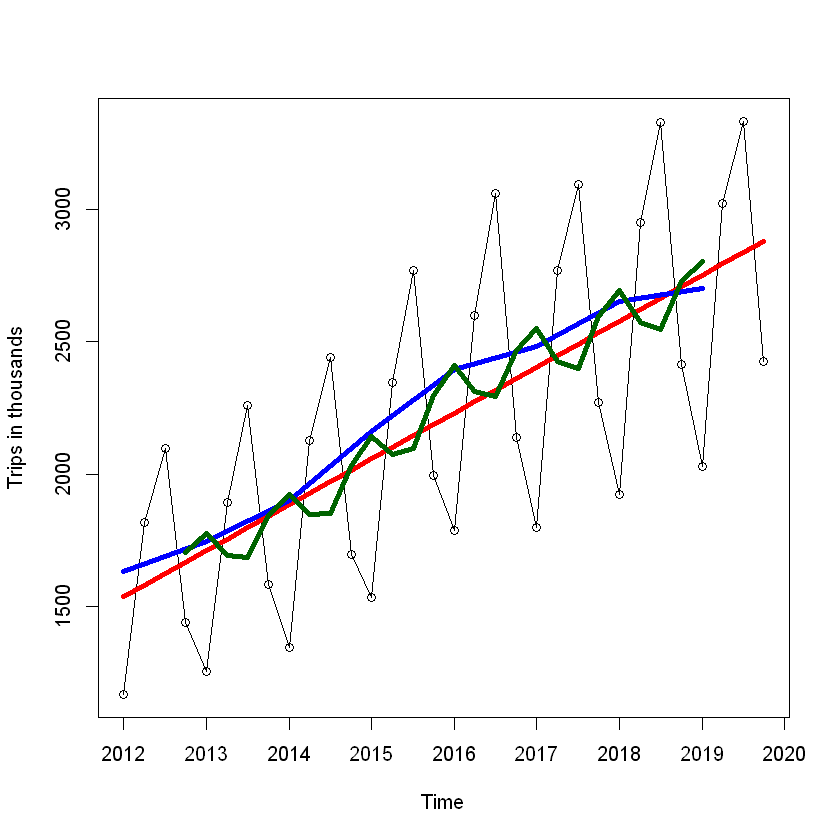

In [44]:
# TimePlot

plot(trips, xlab = "Time", ylab = "Trips in thousands", type='o' )
axis(1, at=2012:2020);axis(2);box()

# Linear model
trips_lm <- lm(trips~time(trips))

x <- as.vector(time(trips))
y <- predict.lm(trips_lm)
lines(x,y, col='red', lw=4)

lines(aggregate(trips, FUN=mean), col='blue', lw=4)

y <- ma(trips, order=6)
lines(x,y, col='dark green', lw=4)


Data has a strong positive trend. Number of trips have increased over time. There might some seasonal patterm Similar patter over the same time on each year. 

Linear trend - red avarage of the mean

Because it has a strong trend, we will investigate transformations. In order to manipulate (forecast) the data need to be flat or stationary (Mean is cconstant over series and other parameters like variance and autocorrelation)


## Moving Averages

In [45]:
library(forecast)

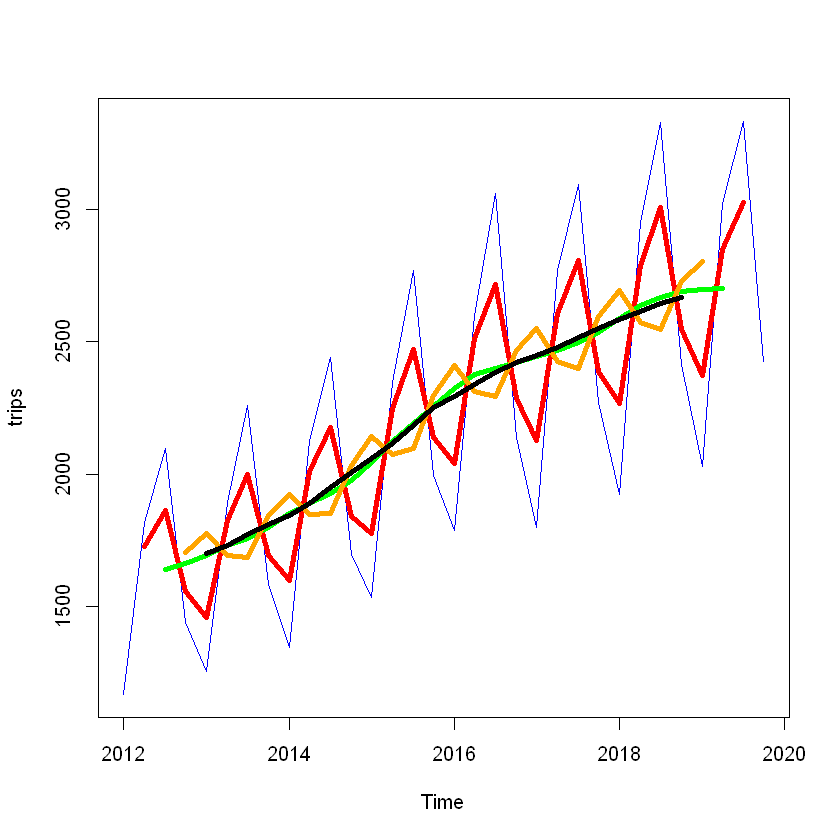

In [54]:
plot(trips, col='blue')

x <- as.vector(time(trips))

y <- ma(trips, order=2)
lines(x, y, col='red', lw=4)
y <- ma(trips, order=4)
lines(x, y, col='green', lw=4)
y <- ma(trips, order=6)
lines(x, y, col='orange', lw=4)
y <- ma(trips, order=8)
lines(x, y, col='black', lw=4)

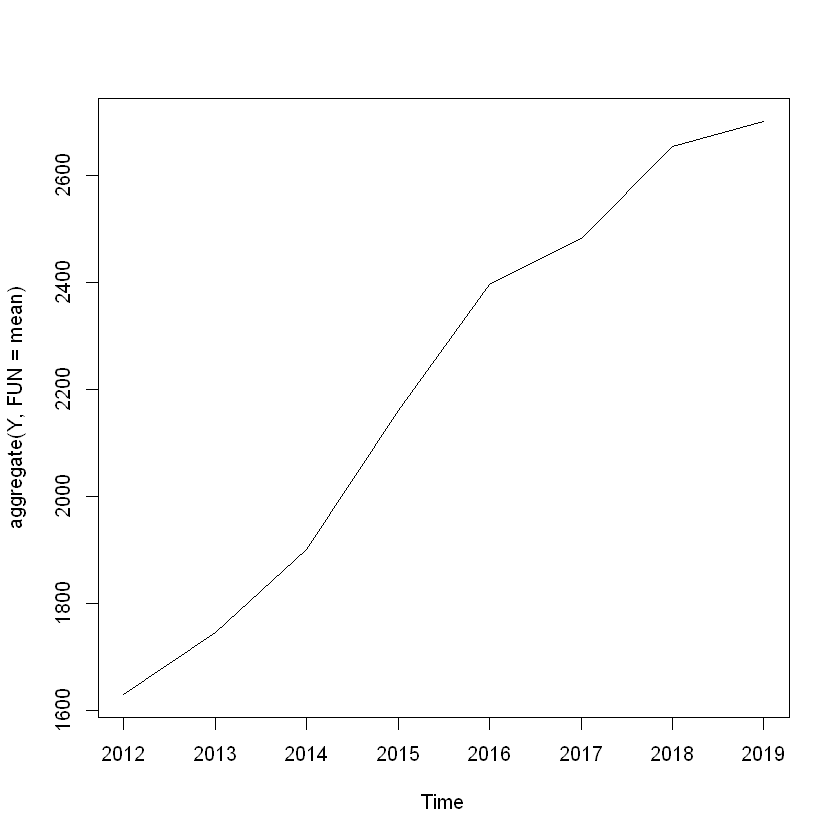

In [52]:
# Check general trend
plot(aggregate(Y, FUN=mean))

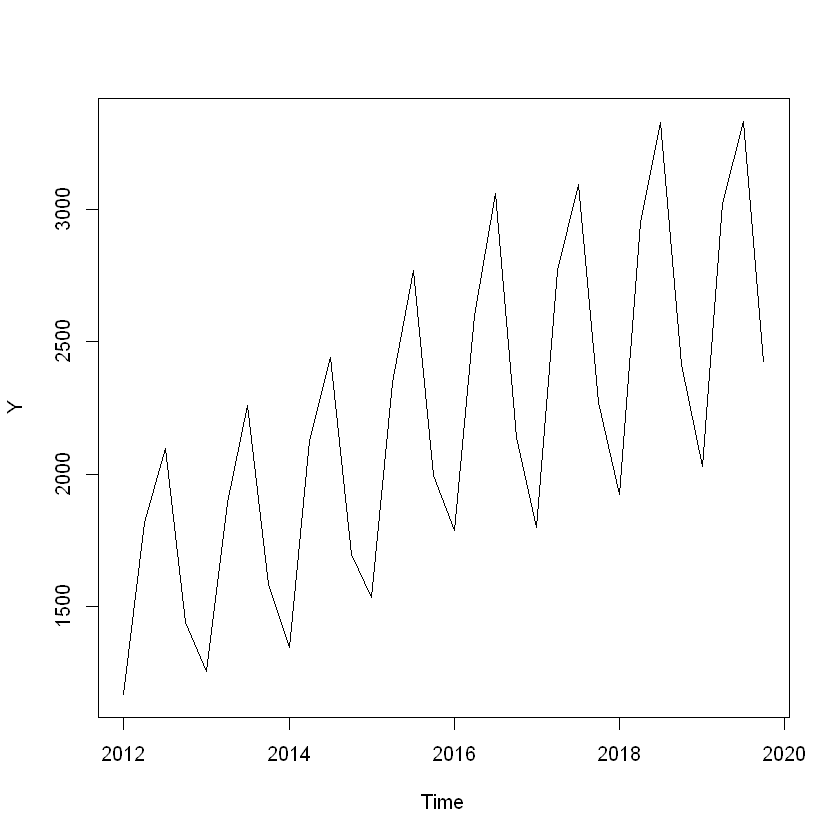

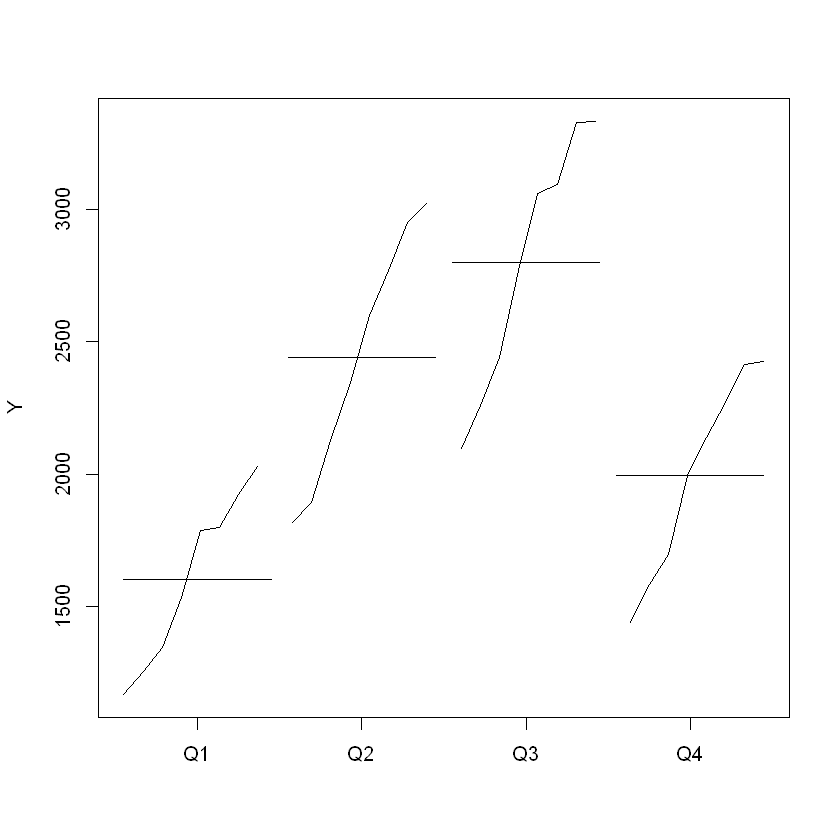

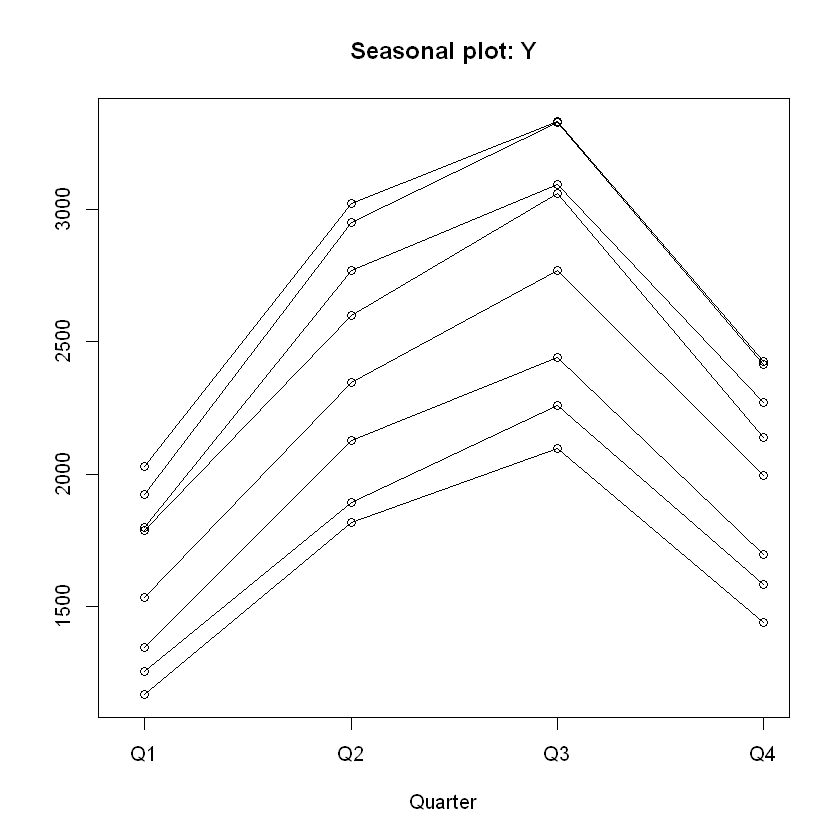

In [28]:
plot(Y)
monthplot(Y)
seasonplot(Y)

## Decomposition

### Multiplicative Linear Decomposition

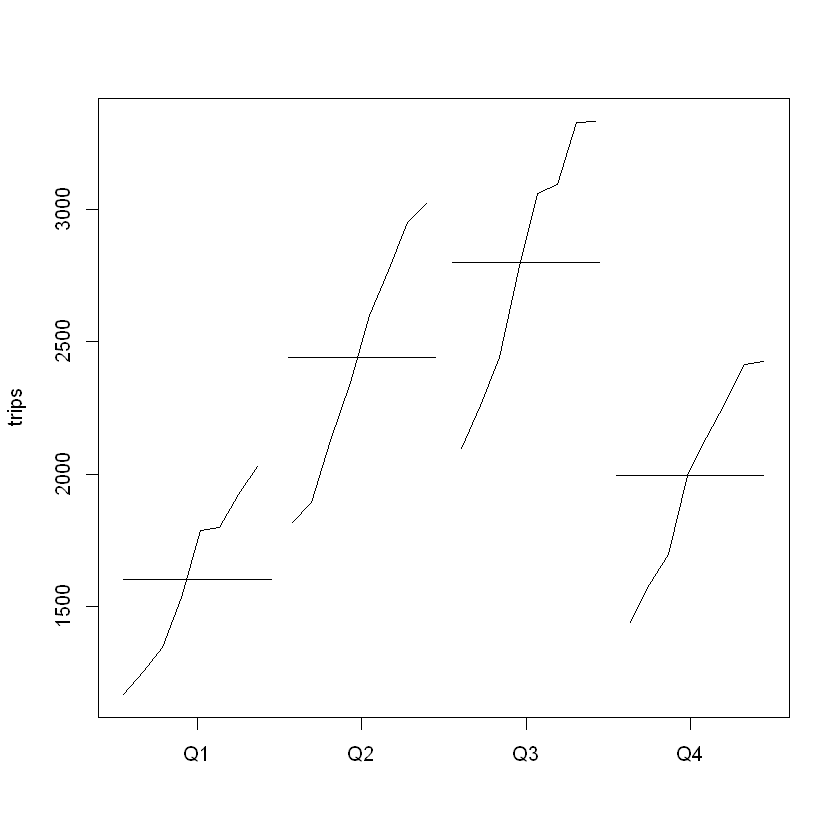

In [56]:
monthplot(trips)

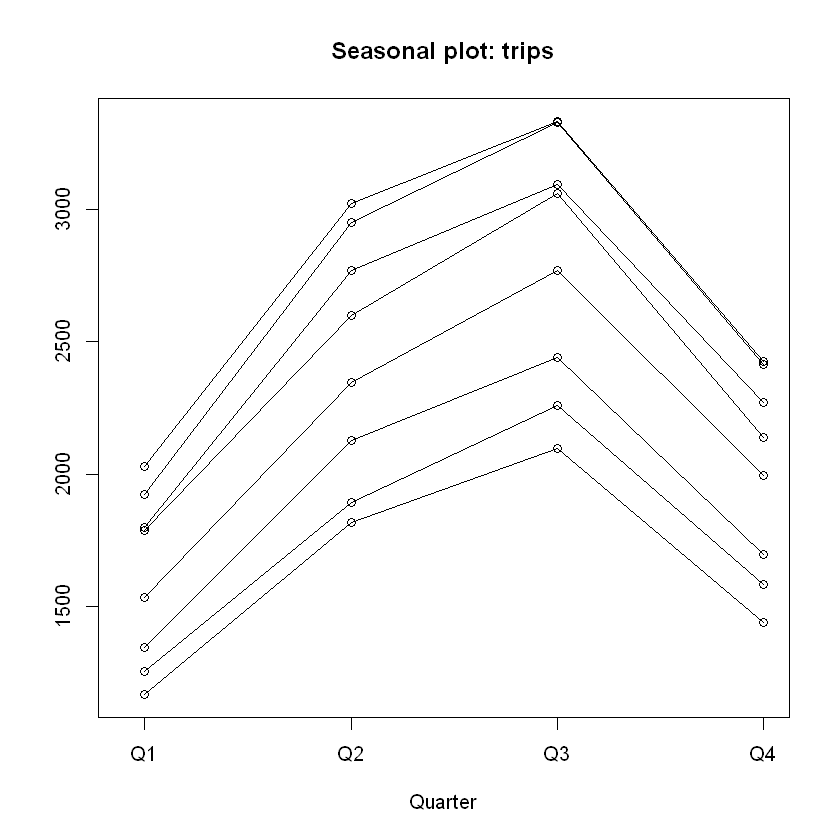

In [57]:
seasonplot(trips)

$x
       Qtr1   Qtr2   Qtr3   Qtr4
2012 1165.1 1817.3 2096.7 1438.0
2013 1251.7 1893.0 2261.0 1580.1
2014 1342.5 2126.6 2440.4 1694.9
2015 1531.3 2344.9 2770.9 1995.9
2016 1784.7 2598.9 3061.5 2139.2
2017 1796.1 2769.4 3095.6 2270.9
2018 1920.7 2951.9 3330.9 2412.8
2019 2026.7 3021.8 3334.4 2424.6

$seasonal
          Qtr1      Qtr2      Qtr3      Qtr4
2012 0.7439227 1.1109252 1.2651479 0.8800042
2013 0.7439227 1.1109252 1.2651479 0.8800042
2014 0.7439227 1.1109252 1.2651479 0.8800042
2015 0.7439227 1.1109252 1.2651479 0.8800042
2016 0.7439227 1.1109252 1.2651479 0.8800042
2017 0.7439227 1.1109252 1.2651479 0.8800042
2018 0.7439227 1.1109252 1.2651479 0.8800042
2019 0.7439227 1.1109252 1.2651479 0.8800042

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2012       NA       NA 1640.100 1660.387
2013 1690.387 1728.688 1757.800 1798.350
2014 1849.975 1886.750 1924.700 1975.587
2015 2044.188 2123.125 2192.425 2255.850
2016 2323.925 2378.163 2397.500 2420.238
2017 2445.812 2466.538 2498.57

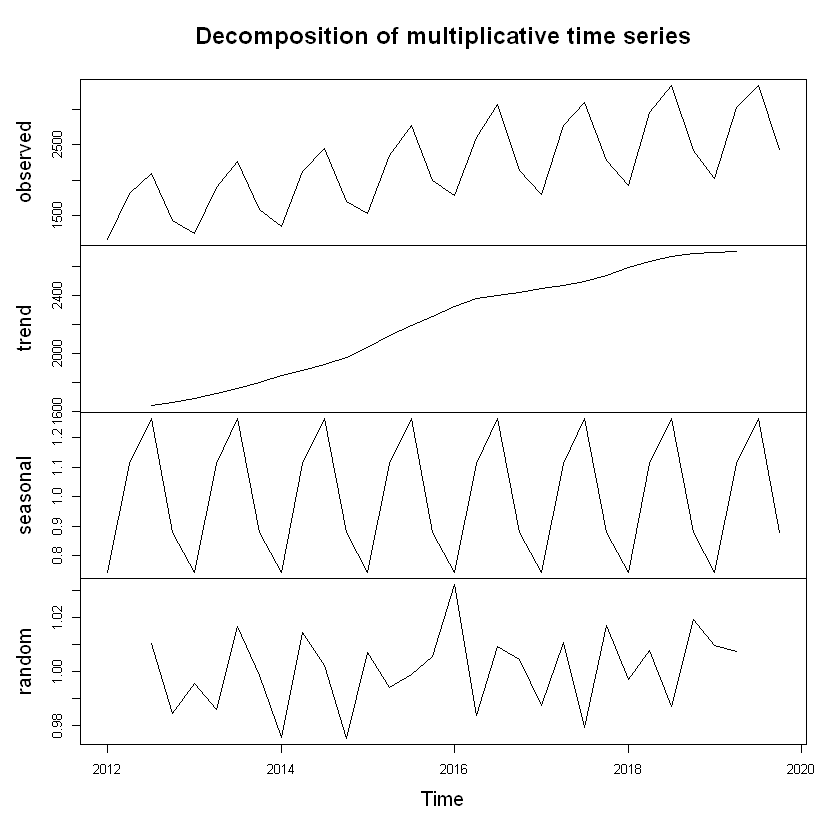

In [59]:
# Seasonal decomposition using decompose() - multiplicative
fit.decmult <- decompose(trips, type="multiplicative")
fit.decmult
plot(fit.decmult)

# Values Ploted: fit.decmult$trend
# Trend
# Season: normalised at variates around 1. Around 25% up and down
# random: it looks arbitrary which is fine

In [61]:
names(fit.decmult)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [63]:
mean(fit.decmult$seasonal)

[1] 1

In [64]:
mean(fit.decmult$random, na.rm=TRUE)

[1] 1.000576

In [67]:
fit.decmult$trend * fit.decmult$seasonal * fit.decmult$random 

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,2096.7,1438.0
2013,1251.7,1893.0,2261.0,1580.1
2014,1342.5,2126.6,2440.4,1694.9
2015,1531.3,2344.9,2770.9,1995.9
2016,1784.7,2598.9,3061.5,2139.2
2017,1796.1,2769.4,3095.6,2270.9
2018,1920.7,2951.9,3330.9,2412.8
2019,2026.7,3021.8,NA,NA


In [72]:
fit.decmult$x

,Qtr1,Qtr2,Qtr3,Qtr4
2012,1165.1,1817.3,2096.7,1438.0
2013,1251.7,1893.0,2261.0,1580.1
2014,1342.5,2126.6,2440.4,1694.9
2015,1531.3,2344.9,2770.9,1995.9
2016,1784.7,2598.9,3061.5,2139.2
2017,1796.1,2769.4,3095.6,2270.9
2018,1920.7,2951.9,3330.9,2412.8
2019,2026.7,3021.8,3334.4,2424.6


Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


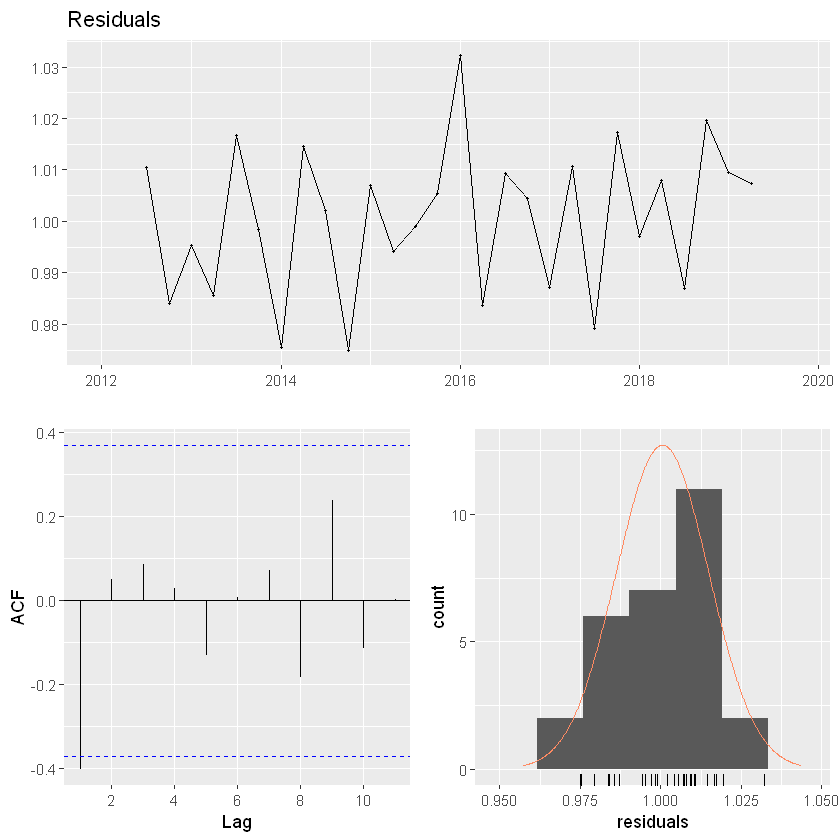

In [68]:
checkresiduals(remainder(fit.decmult))

In [70]:
?acf

In [41]:
?acf

### Additive linear decomposition

$x
       Qtr1   Qtr2   Qtr3   Qtr4
2012 1165.1 1817.3 2096.7 1438.0
2013 1251.7 1893.0 2261.0 1580.1
2014 1342.5 2126.6 2440.4 1694.9
2015 1531.3 2344.9 2770.9 1995.9
2016 1784.7 2598.9 3061.5 2139.2
2017 1796.1 2769.4 3095.6 2270.9
2018 1920.7 2951.9 3330.9 2412.8
2019 2026.7 3021.8 3334.4 2424.6

$seasonal
          Qtr1      Qtr2      Qtr3      Qtr4
2012 -568.7491  256.2170  569.3705 -256.8384
2013 -568.7491  256.2170  569.3705 -256.8384
2014 -568.7491  256.2170  569.3705 -256.8384
2015 -568.7491  256.2170  569.3705 -256.8384
2016 -568.7491  256.2170  569.3705 -256.8384
2017 -568.7491  256.2170  569.3705 -256.8384
2018 -568.7491  256.2170  569.3705 -256.8384
2019 -568.7491  256.2170  569.3705 -256.8384

$trend
         Qtr1     Qtr2     Qtr3     Qtr4
2012       NA       NA 1640.100 1660.387
2013 1690.387 1728.688 1757.800 1798.350
2014 1849.975 1886.750 1924.700 1975.587
2015 2044.188 2123.125 2192.425 2255.850
2016 2323.925 2378.163 2397.500 2420.238
2017 2445.812 2466.538 2498.57

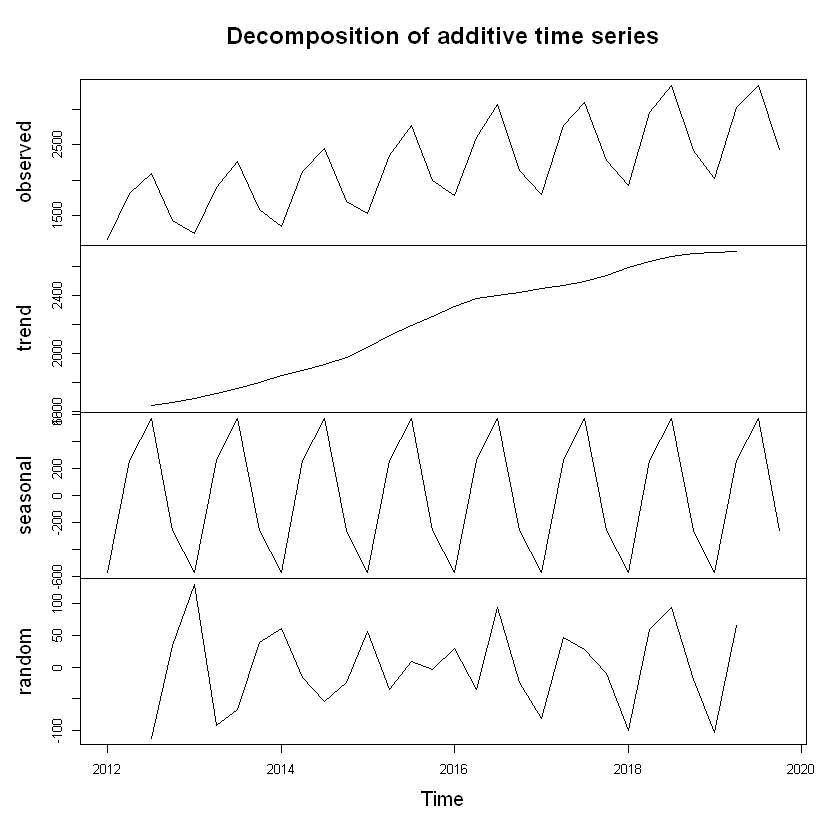

In [78]:
# Seasonal decomposition using decompose() - additive
fit.decadd <- decompose(trips, type="additive")
fit.decadd
plot(fit.decadd)

To get the season nice an cte in sieze there is some compoensantion comming from random variable.

In [79]:
head(fit.decadd$trend, 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,1640.100,1660.387
2013,1690.387,1728.688,1757.800,1798.350
2014,1849.975,1886.750,1924.700,1975.587
2015,2044.188,2123.125,2192.425,2255.850
2016,2323.925,2378.163,2397.500,2420.238
2017,2445.812,2466.538,2498.575,2536.963
2018,2589.188,2636.338,2667.325,2689.313
2019,2698.488,2700.400,NA,NA


In [80]:
fit.decadd$seasonal

,Qtr1,Qtr2,Qtr3,Qtr4
2012,-568.7491,256.2170,569.3705,-256.8384
2013,-568.7491,256.2170,569.3705,-256.8384
2014,-568.7491,256.2170,569.3705,-256.8384
2015,-568.7491,256.2170,569.3705,-256.8384
2016,-568.7491,256.2170,569.3705,-256.8384
2017,-568.7491,256.2170,569.3705,-256.8384
2018,-568.7491,256.2170,569.3705,-256.8384
2019,-568.7491,256.2170,569.3705,-256.8384


In [85]:
head(fit.decadd$random, 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,-112.770536,34.450893
2013,130.061607,-91.904464,-66.170536,38.588393
2014,61.274107,-16.366964,-53.670536,-23.849107
2015,55.861607,-34.441964,9.104464,-3.111607
2016,29.524107,-35.479464,94.629464,-24.199107
2017,-80.963393,46.645536,27.654464,-9.224107
2018,-99.738393,59.345536,94.204464,-19.674107
2019,-103.038393,65.183036,NA,NA


In [82]:
round(mean(fit.decadd$random, na.rm=TRUE),3)

[1] -1.003

In [93]:
round((fit.decadd$trend + fit.decadd$seasonal + fit.decadd$random) - fit.decadd$x, 4)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,0,0
2013,0,0,0,0
2014,0,0,0,0
2015,0,0,0,0
2016,0,0,0,0
2017,0,0,0,0
2018,0,0,0,0
2019,0,0,NA,NA


Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


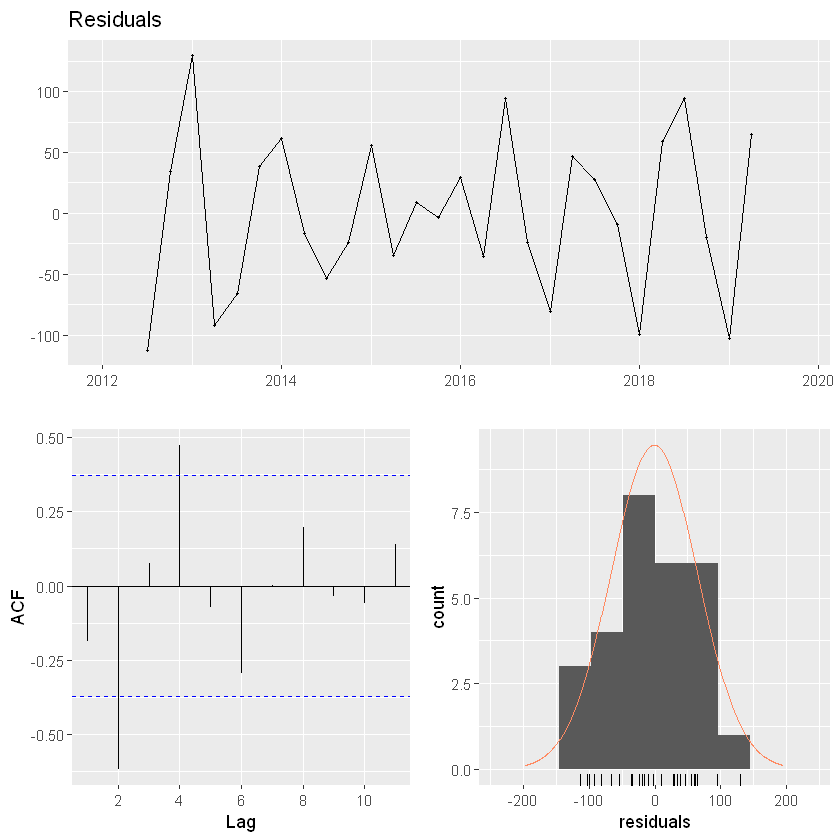

In [37]:
checkresiduals(remainder(fit.decadd))

### Additive logarithmic decomposition

In [94]:
ltrips <- log(trips)

In [96]:
trips_logmod <- lm(ltrips~time(trips))

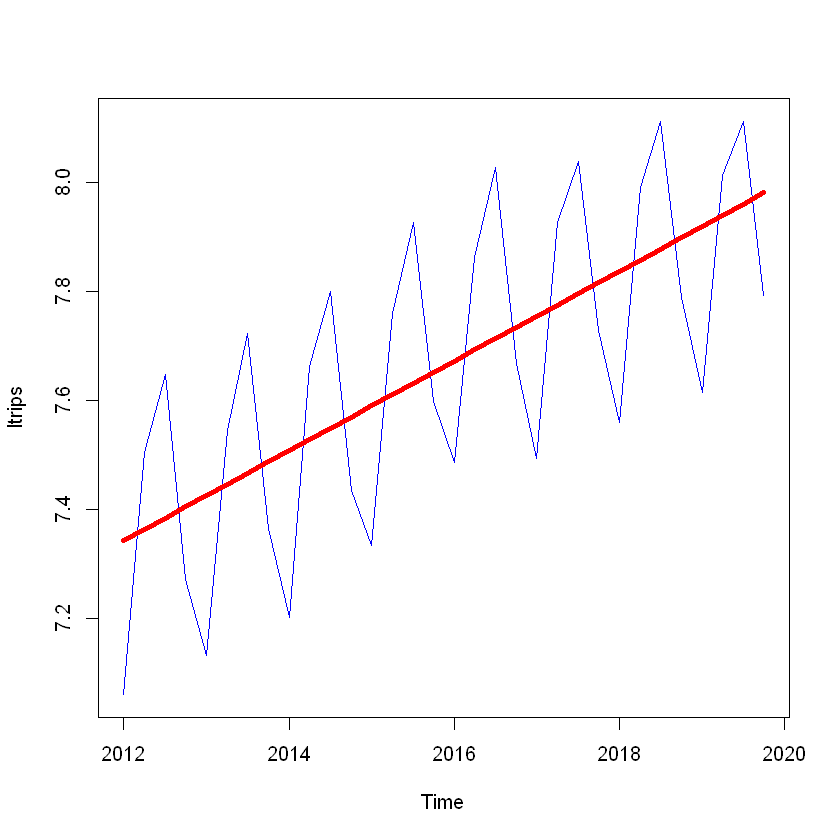

In [97]:
plot(ltrips, col='blue')
x <- as.vector(time(trips))
y <- predict.lm(trips_logmod)
lines(x, y, col='red', lw=4)

In [99]:
fit.logadd <- decompose(ltrips, type='additive')

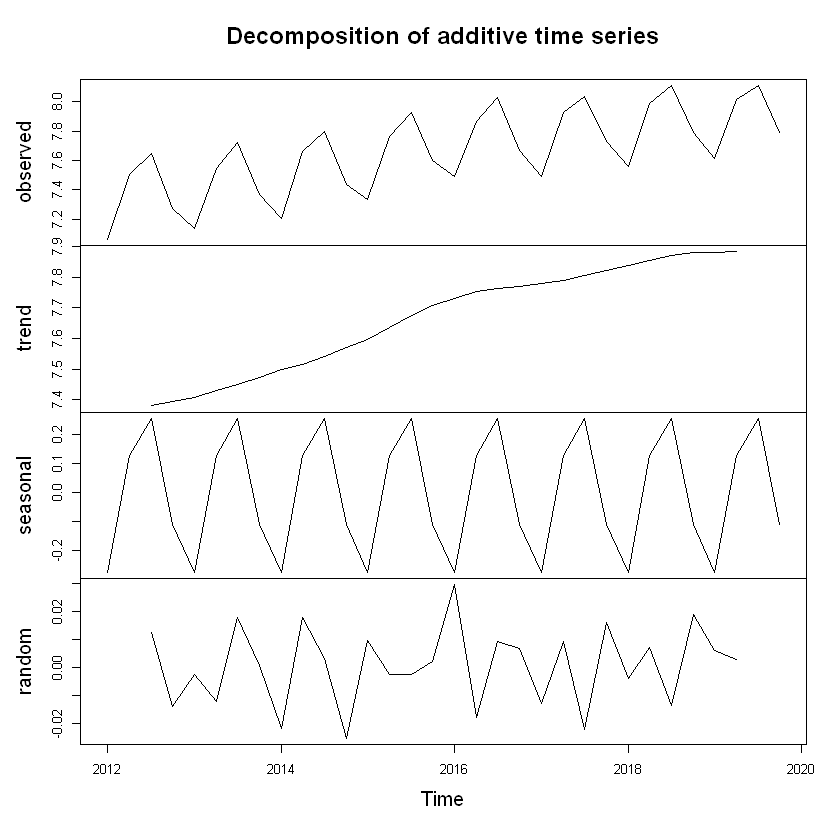

In [102]:
plot(fit.logadd)

In [104]:
names(fit.logadd)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [105]:
head(exp(fit.logadd$trend), 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,1603.849,1626.563
2013,1650.373,1685.750,1720.722,1761.284
2014,1804.228,1837.570,1884.493,1939.289
2015,1994.538,2068.291,2151.786,2221.751
2016,2278.730,2327.400,2349.529,2370.151
2017,2392.361,2413.634,2452.200,2492.651
2018,2535.731,2578.521,2615.636,2640.973
2019,2649.058,2651.022,NA,NA


In [106]:
head(exp(fit.logadd$seasonal), 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,0.7603141,1.1366136,1.2907689,0.8964903
2013,0.7603141,1.1366136,1.2907689,0.8964903
2014,0.7603141,1.1366136,1.2907689,0.8964903
2015,0.7603141,1.1366136,1.2907689,0.8964903
2016,0.7603141,1.1366136,1.2907689,0.8964903
2017,0.7603141,1.1366136,1.2907689,0.8964903
2018,0.7603141,1.1366136,1.2907689,0.8964903
2019,0.7603141,1.1366136,1.2907689,0.8964903


In [107]:
head(exp(fit.logadd$random), 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,1.0128017,0.9861485
2013,0.9975281,0.9879716,1.0179848,1.0007131
2014,0.9786555,1.0181906,1.0032703,0.9748906
2015,1.0097755,0.9974698,0.9976384,1.0020693
2016,1.0301000,0.9824392,1.0094969,1.0067691
2017,0.9874399,1.0094886,0.9780036,1.0162275
2018,0.9962386,1.0072057,0.9865880,1.0190881
2019,1.0062476,1.0028581,NA,NA


In [110]:
head(exp(fit.logadd$trend) * exp(fit.logadd$seasonal) * exp(fit.logadd$random), 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,NA,NA,2096.7,1438.0
2013,1251.7,1893.0,2261.0,1580.1
2014,1342.5,2126.6,2440.4,1694.9
2015,1531.3,2344.9,2770.9,1995.9
2016,1784.7,2598.9,3061.5,2139.2
2017,1796.1,2769.4,3095.6,2270.9
2018,1920.7,2951.9,3330.9,2412.8
2019,2026.7,3021.8,NA,NA


In [111]:
head(exp(fit.logadd$x), 36)

,Qtr1,Qtr2,Qtr3,Qtr4
2012,1165.1,1817.3,2096.7,1438.0
2013,1251.7,1893.0,2261.0,1580.1
2014,1342.5,2126.6,2440.4,1694.9
2015,1531.3,2344.9,2770.9,1995.9
2016,1784.7,2598.9,3061.5,2139.2
2017,1796.1,2769.4,3095.6,2270.9
2018,1920.7,2951.9,3330.9,2412.8
2019,2026.7,3021.8,3334.4,2424.6


Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


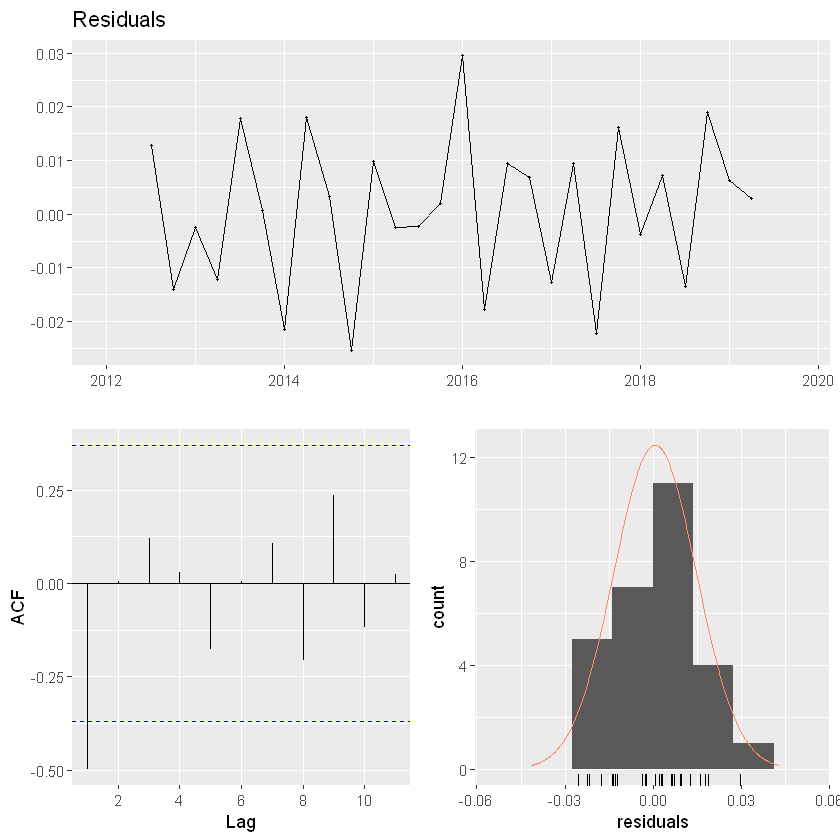

In [112]:
checkresiduals(remainder(fit.logadd))

Additive log log decomposition

In [115]:
trips_loglogmod <- lm(ltrips~log(time(trips)))

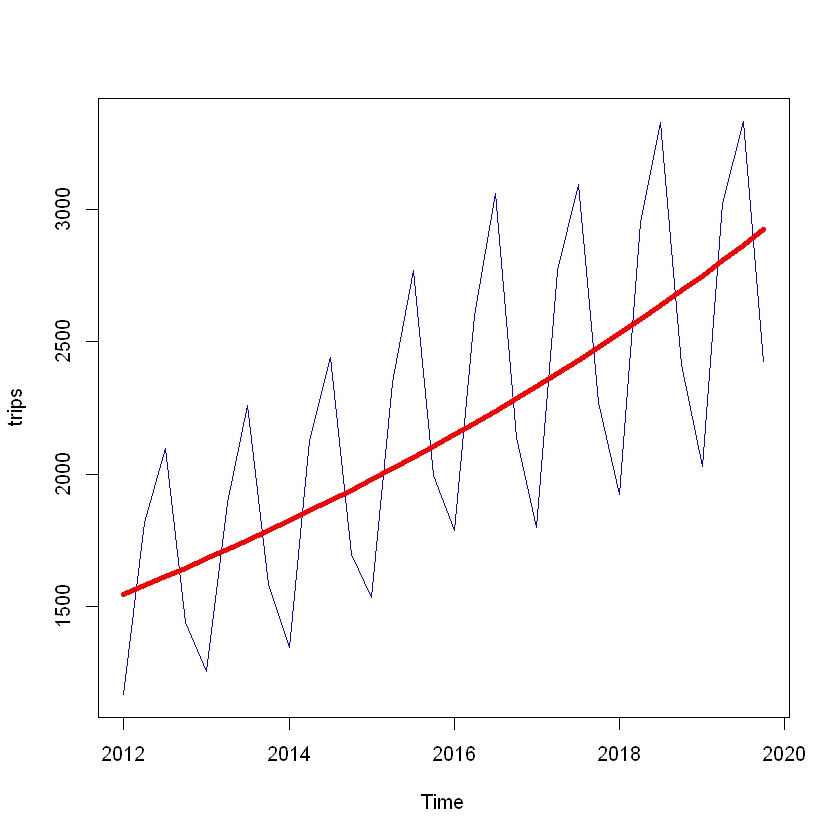

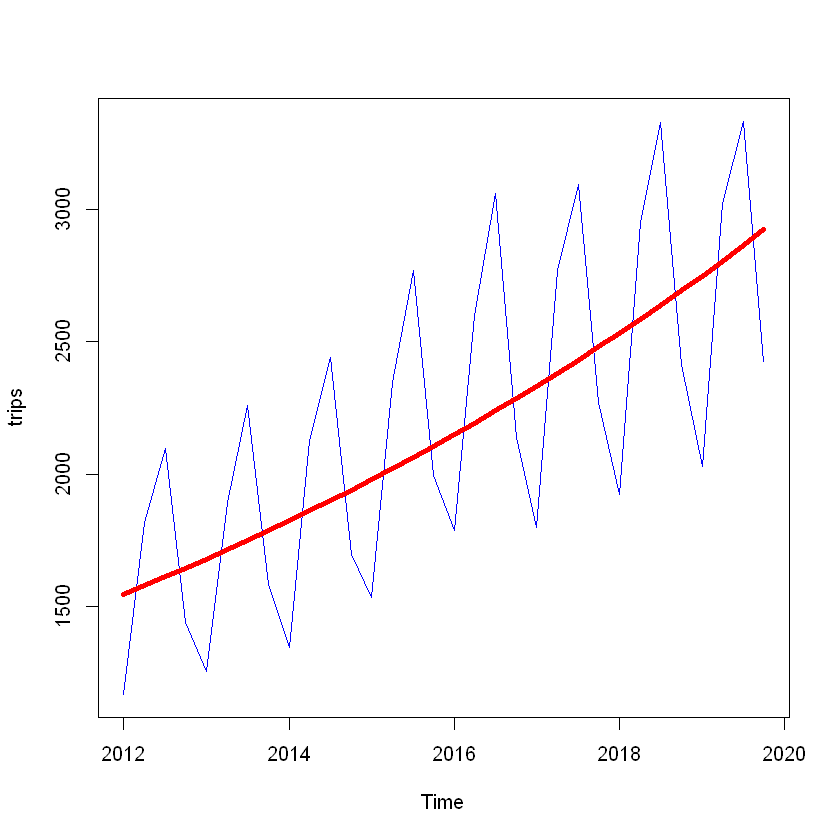

In [118]:
plot(trips, col='blue')
x <- as.vector(time(trips))
y <- exp(predict.lm(trips_logmod))
lines(x, y, col='red', lw=4)

plot(trips, col='blue')
x <- as.vector(time(trips))
y <- exp(predict.lm(trips_loglogmod))
lines(x, y, col='red', lw=4)

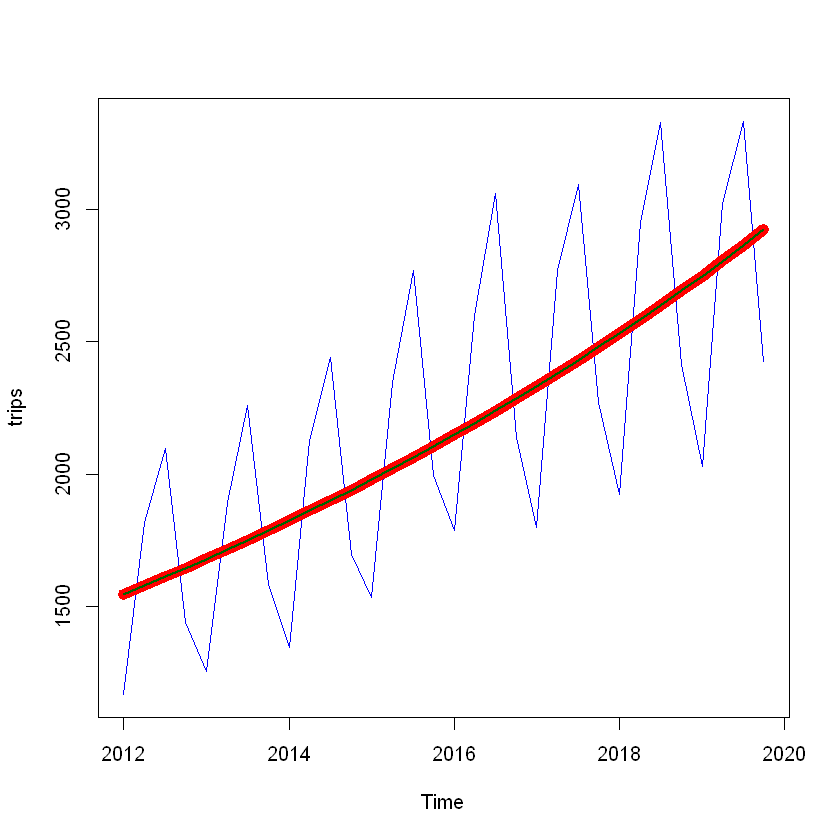

In [120]:
plot(trips, col='blue')
x <- as.vector(time(trips))
y <- exp(predict.lm(trips_logmod))
lines(x, y, col='red', lw=9)

y <- exp(predict.lm(trips_loglogmod))
lines(x, y, col='darkgreen', lw=2)

log y = b x >>equivalent>> y = exp(b x) --> it grows faster

In [ ]:
y = x^b >>equivalent>> log y = b log x --> it grow less than exponential

In [ ]:
y = b x --> linear

sqrt (y) = b sqrt(x)
y = b^2x

sqrt(y) = b x
y = b^2 x^2

 ### STL - Loess

Locally estimated scatterplot smoothing

,seasonal,trend,remainder
2012 Q1,-0.2787037,7.351133,-0.0118669189
2012 Q2,0.1279108,7.365498,0.0116978963
2012 Q3,0.2543035,7.379835,0.0139811900
2012 Q4,-0.1035106,7.393429,-0.0189098880
2013 Q1,-0.2787037,7.407542,0.0034193432
2013 Q2,0.1279108,7.430067,-0.0120599762
2013 Q3,0.2543035,7.451330,0.0179285850
2013 Q4,-0.1035106,7.473509,-0.0047548438
2014 Q1,-0.2787037,7.496831,-0.0158388778
2014 Q2,0.1279108,7.517454,0.0169146535


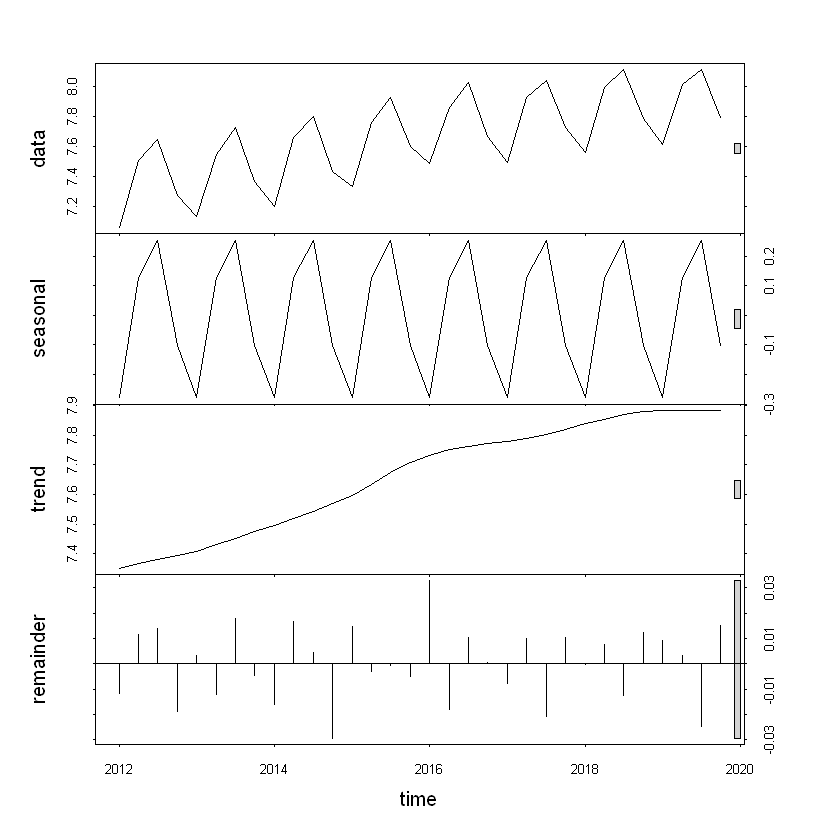

In [124]:
stl_desc <- stl(ltrips, s.window='periodic')
stl_desc$time.series
plot(stl_desc)


In [130]:
head(exp(stl_desc$time.series), 40)

,seasonal,trend,remainder
2012 Q1,0.7567641,1557.960,0.9882032
2012 Q2,1.1364516,1580.503,1.0117666
2012 Q3,1.2895631,1603.326,1.0140794
2012 Q4,0.9016664,1625.270,0.9812678
2013 Q1,0.7567641,1648.370,1.0034252
2013 Q2,1.1364516,1685.921,0.9880125
2013 Q3,1.2895631,1722.153,1.0180903
2013 Q4,0.9016664,1760.774,0.9952564
2014 Q1,0.7567641,1802.322,0.9842859
2014 Q2,1.1364516,1839.878,1.0170585


In [125]:
summary(exp(stl_desc$time.series))

    seasonal          trend        remainder     
 Min.   :0.7568   Min.   :1558   Min.   :0.9709  
 1st Qu.:0.8654   1st Qu.:1792   1st Qu.:0.9882  
 Median :1.0191   Median :2253   Median :1.0020  
 Mean   :1.0211   Mean   :2161   Mean   :1.0004  
 3rd Qu.:1.1747   3rd Qu.:2504   3rd Qu.:1.0109  
 Max.   :1.2896   Max.   :2654   Max.   :1.0333  

Warning message in modeldf.default(object):
"Could not find appropriate degrees of freedom for this model."


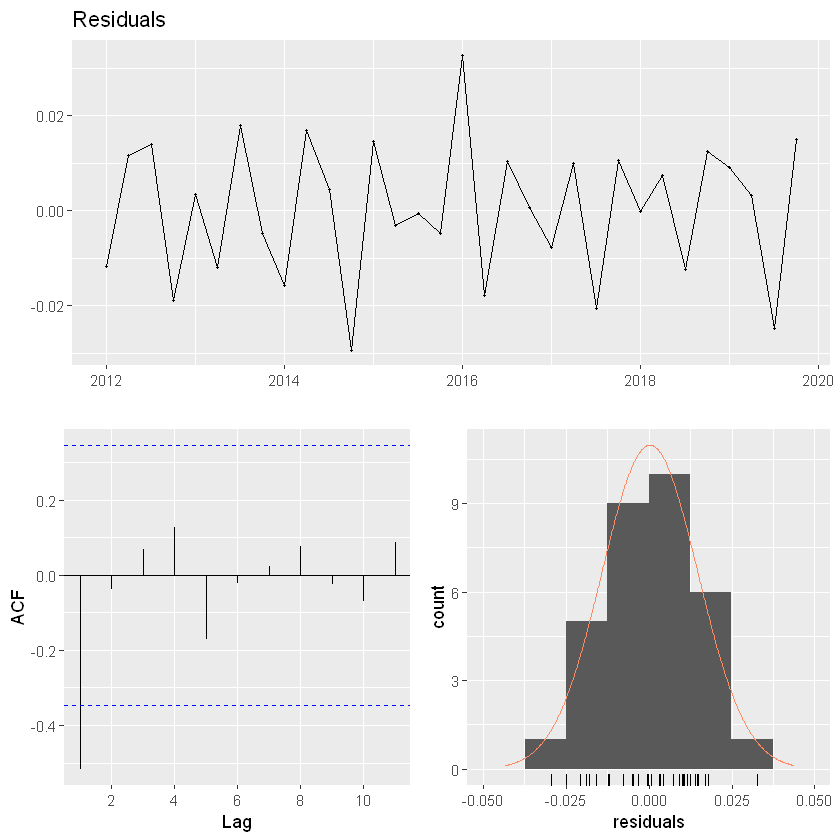

In [131]:
checkresiduals(remainder(stl_desc))

## First difference

Transform the data using "First difference" to remove the trend

In [139]:
?diff

In [27]:
ndiffs(trips)

[1] 1

In [28]:
trips_diff <- diff(trips)
DYLog <- diff(log(trips))

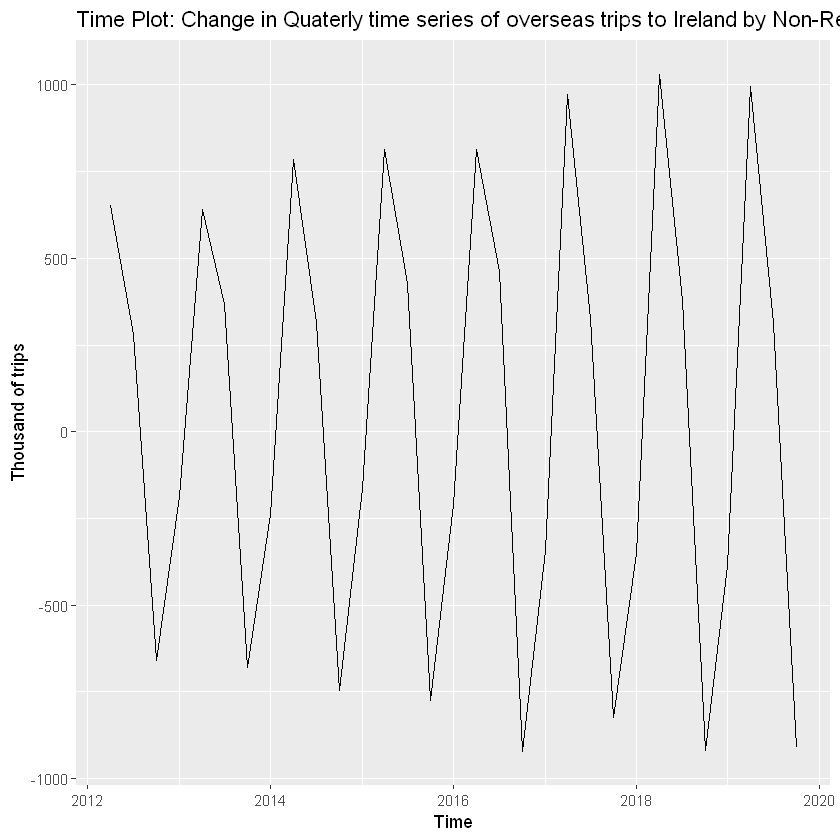

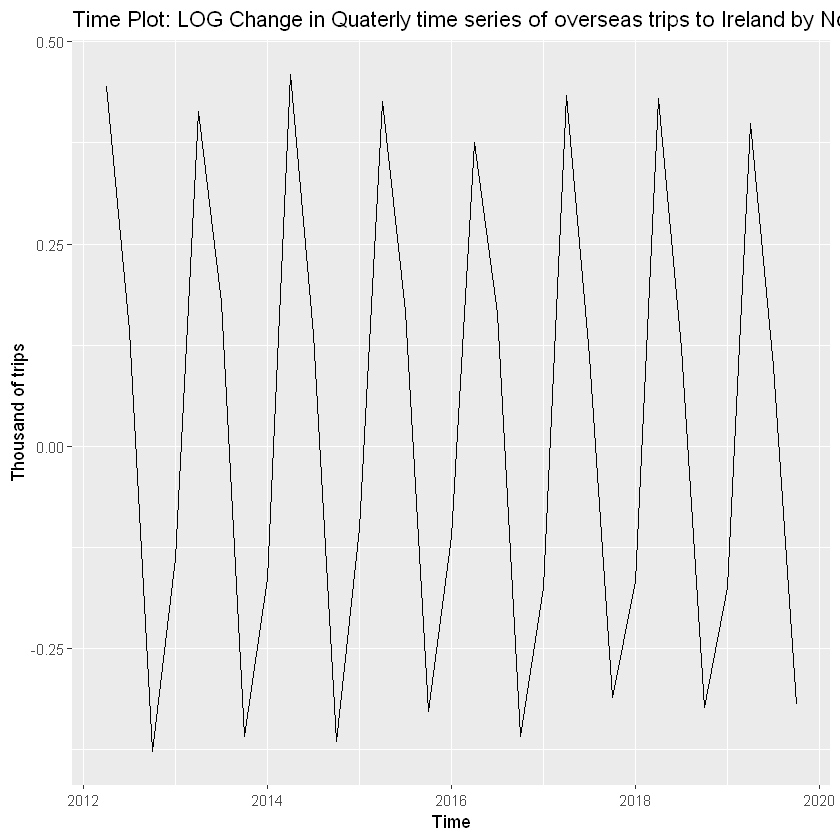

In [29]:
# Change from Quarter to quarter
autoplot(trips_diff) + ggtitle("Time Plot: Change in Quaterly time series of overseas trips to Ireland by Non-Residents") +
ylab("Thousand of trips")

autoplot(DYLog) + ggtitle("Time Plot: LOG Change in Quaterly time series of overseas trips to Ireland by Non-Residents") +
ylab("Thousand of trips")

Trend has been removed. Investigate the Fluctuation. Does the irrgularities observed happen on the same quarter every year?

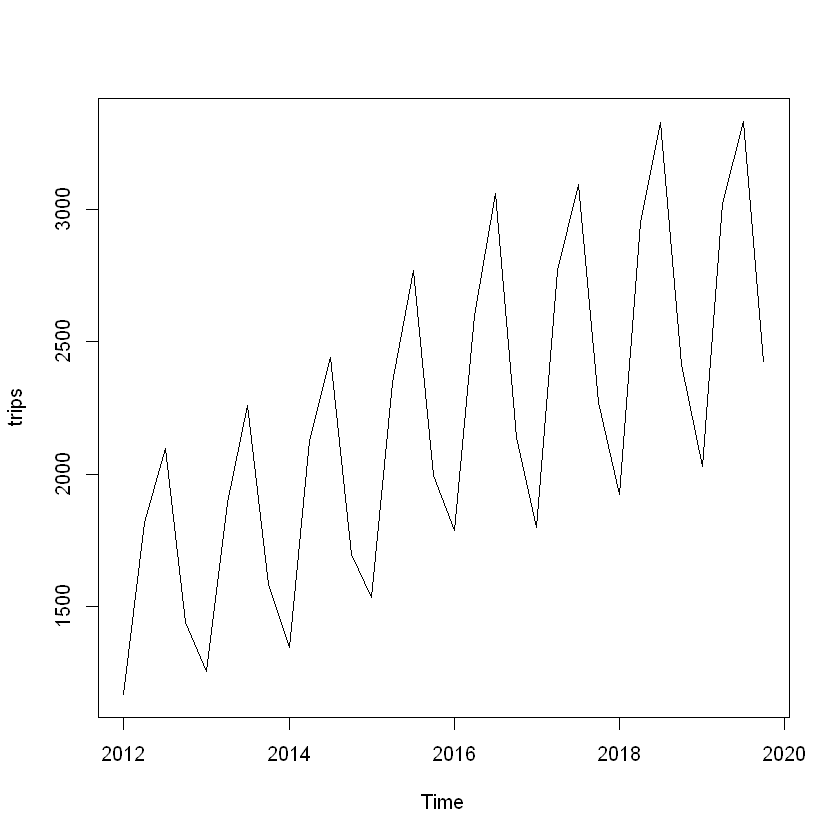

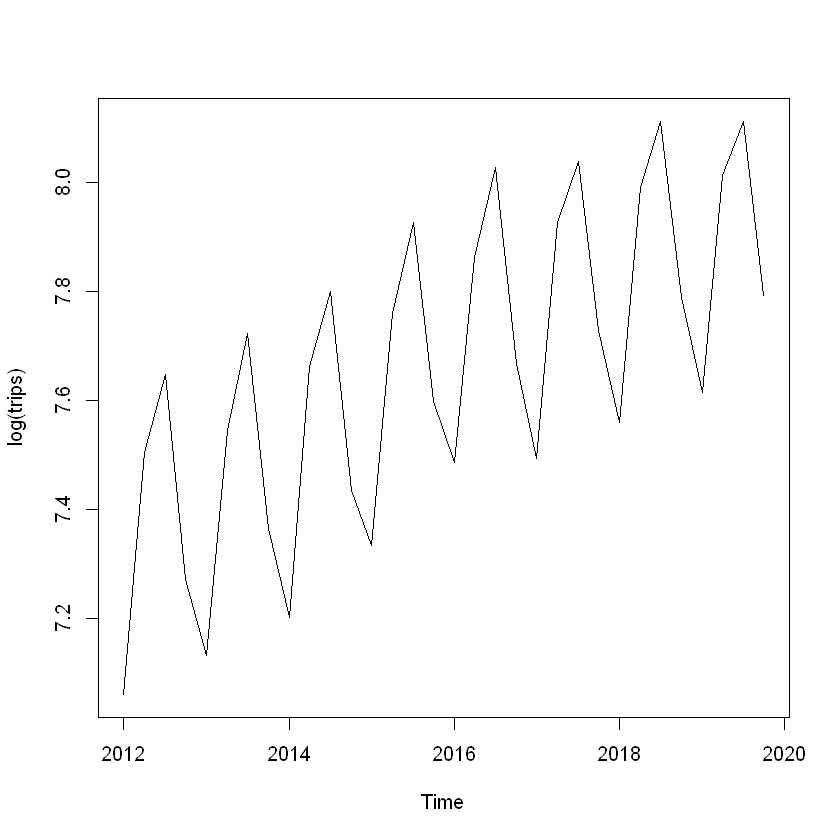

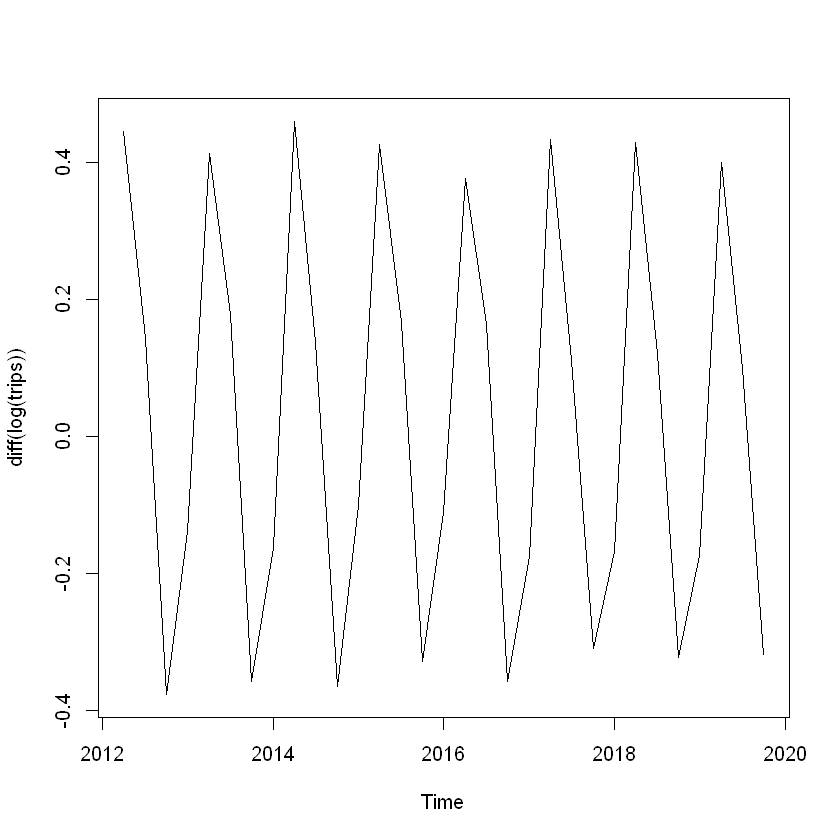

In [136]:

plot(trips)
plot(log(trips)) # Variance will all be equal. Before it was increasing
plot(diff(log(trips))) # Mean will be 0

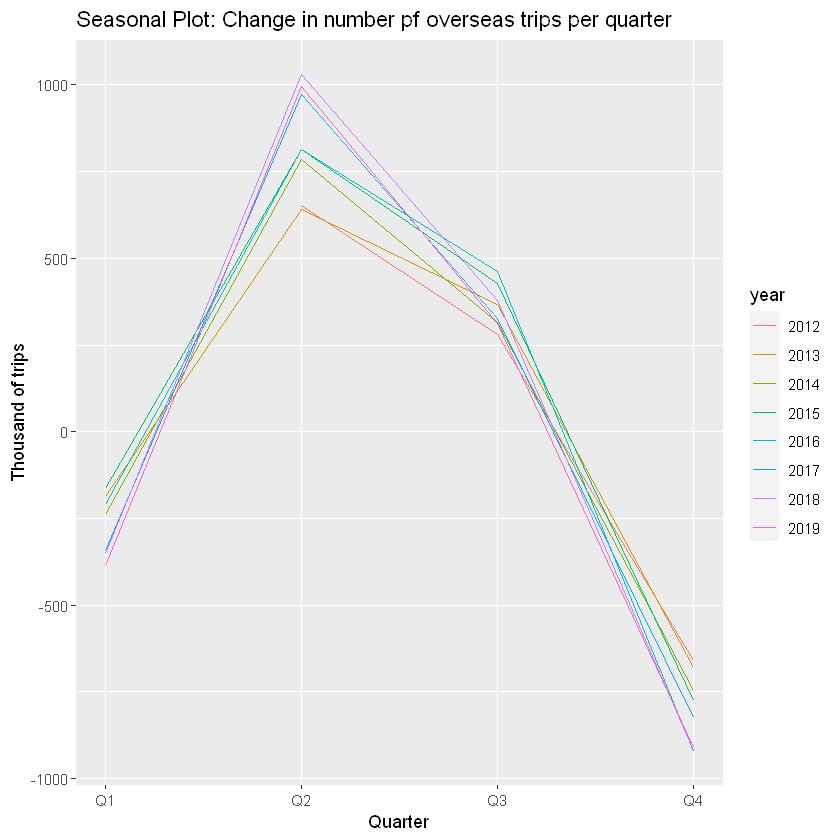

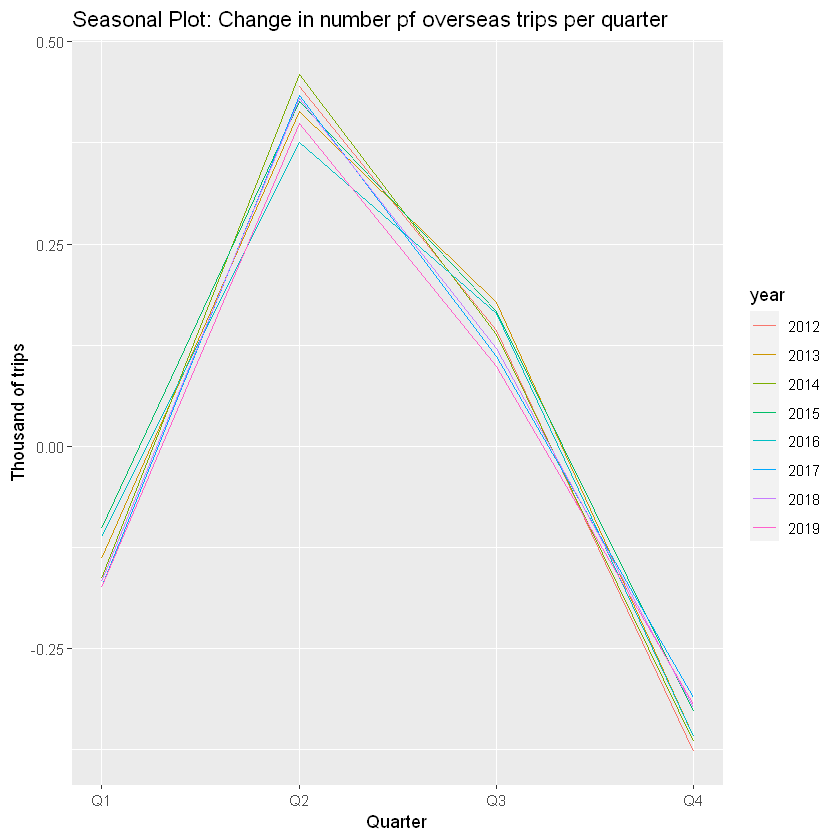

In [137]:
ggseasonplot(trips_diff) + 
ggtitle("Seasonal Plot: Change in number pf overseas trips per quarter") + 
ylab("Thousand of trips")


ggseasonplot(DYLog) + 
ggtitle("Seasonal Plot: Change in number pf overseas trips per quarter") + 
ylab("Thousand of trips")

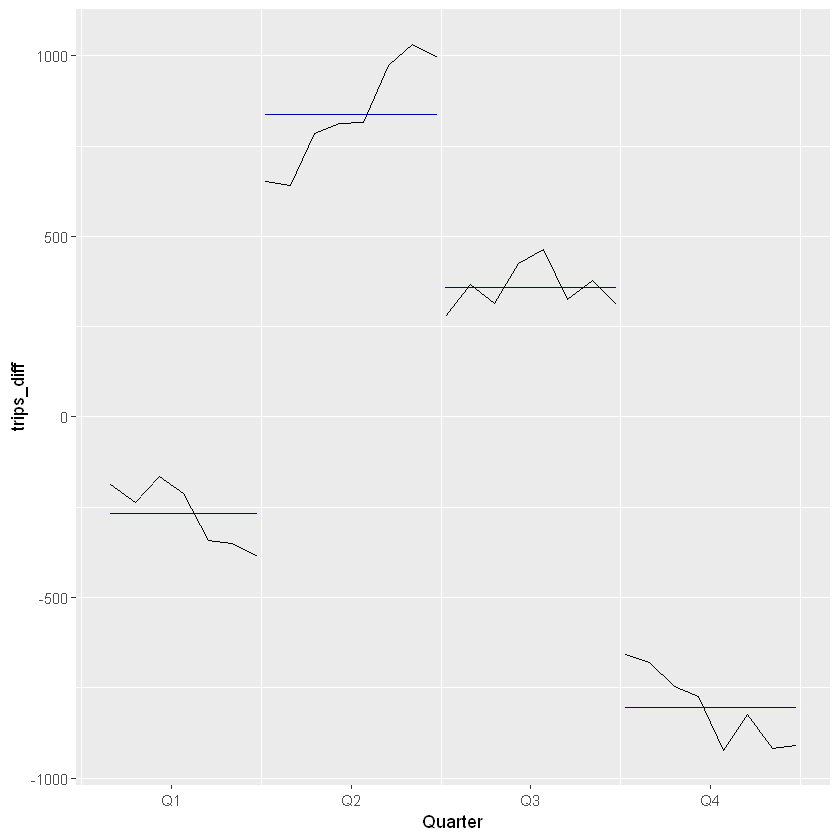

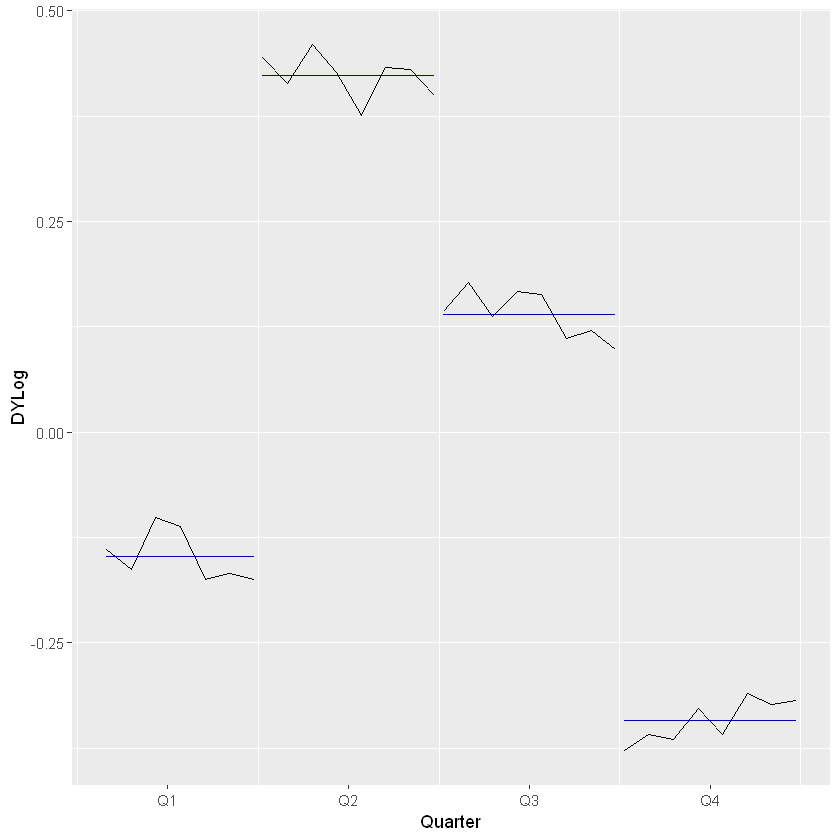

In [138]:
## Another seasonal plot. Subseries plot
ggsubseriesplot(trips_diff)
ggsubseriesplot(DYLog)


Average change from one quarter observed on differen years . From Q1 to to Q2 is positive

In [43]:
fit0 <- arima(DYLog, order=c(0,1,1))
fit0


Call:
arima(x = DYLog, order = c(0, 1, 1))

Coefficients:
         ma1
      0.6713
s.e.  0.1147

sigma^2 estimated as 0.1345:  log likelihood = -12.77,  aic = 29.55

In [44]:
fit1 <- arima(DYLog, order=c(1,1,1))
fit1


Call:
arima(x = DYLog, order = c(1, 1, 1))

Coefficients:
         ar1      ma1
      0.0329  -1.0000
s.e.  0.1938   0.0897

sigma^2 estimated as 0.08939:  log likelihood = -8.03,  aic = 22.07

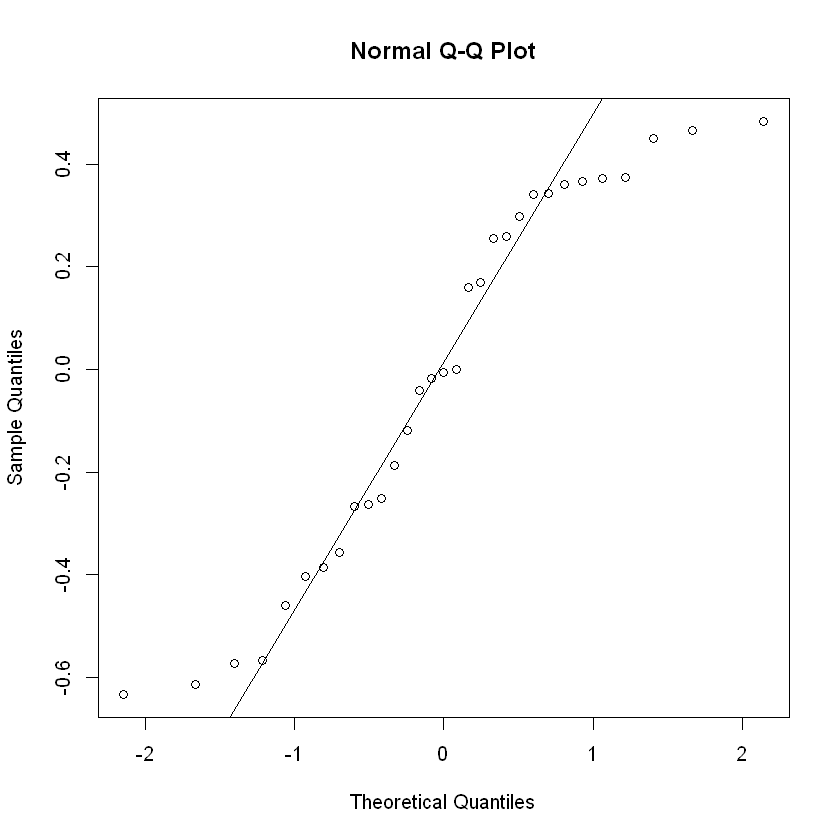

In [45]:
qqnorm(fit0$residuals)
qqline(fit0$residuals)

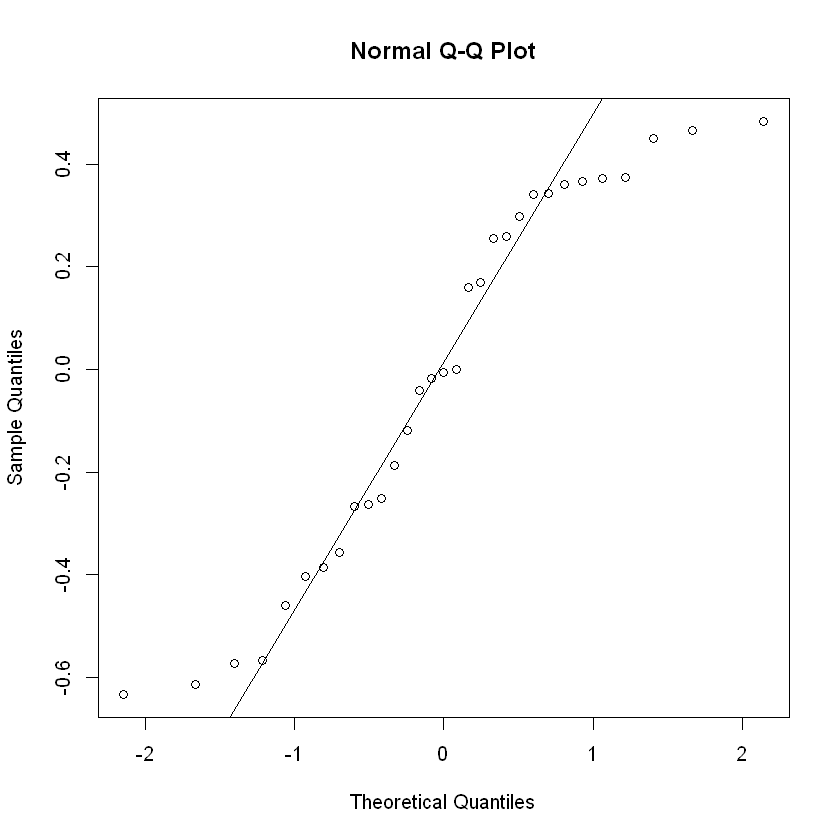

In [46]:
qqnorm(fit0$residuals)
qqline(fit0$residuals)

In [47]:
auto.arima(DYLog)

Series: DYLog 
ARIMA(1,0,0)(0,1,1)[4] 

Coefficients:
          ar1     sma1
      -0.3600  -0.5209
s.e.   0.1791   0.1797

sigma^2 estimated as 0.0008094:  log likelihood=58.14
AIC=-110.29   AICc=-109.24   BIC=-106.4

## Forecasting

In [ ]:
# Forecast with various methods

In [ ]:
# Benchmark to forecast might not work well as it uses the mean
# Lets try with naive method - Is there a strong sesonality??

### Seasonal Naive

Raw data has a trend. We need to use the first difference data


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = trips_diff) 

Residual sd: 80.8587 

Error measures:
                   ME    RMSE      MAE      MPE    MAPE MASE       ACF1
Training set -2.77037 80.8587 66.47407 4.009981 14.6496    1 -0.3017789

Forecasts:
        Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
2020 Q1         -386.1  -489.7246 -282.4754  -544.58013 -227.6199
2020 Q2          995.1   891.4754 1098.7246   836.61987 1153.5801
2020 Q3          312.6   208.9754  416.2246   154.11987  471.0801
2020 Q4         -909.8 -1013.4246 -806.1754 -1068.28013 -751.3199
2021 Q1         -386.1  -532.6473 -239.5527  -610.22475 -161.9752
2021 Q2          995.1   848.5527 1141.6473   770.97525 1219.2248
2021 Q3          312.6   166.0527  459.1473    88.47525  536.7248
2021 Q4         -909.8 -1056.3473 -763.2527 -1133.92475 -685.6752
        Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
2020 Q1         -386.1  -489.7246 -282.4754  -544.5801

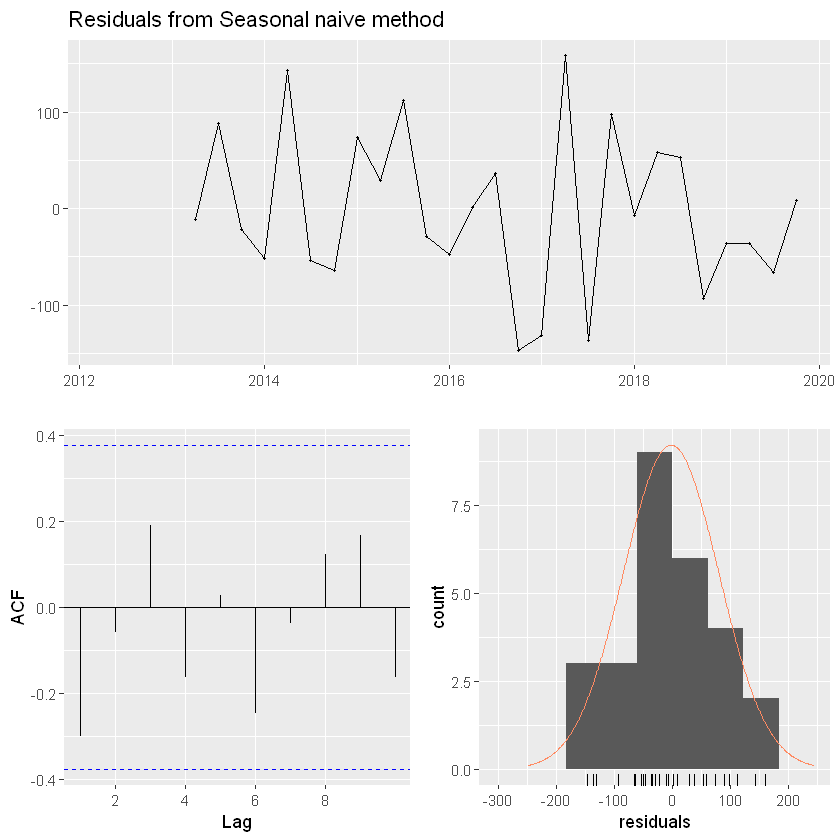

In [156]:
fit <- snaive(trips_diff) 
print(summary(fit))
checkresiduals(fit)


Forecast method: Seasonal naive method

Model Information:
Call: snaive(y = DYLog) 

Residual sd: 0.0343 

Error measures:
                       ME       RMSE        MAE       MPE     MAPE MASE
Training set -0.002474705 0.03426858 0.02865224 -3.325866 14.16389    1
                   ACF1
Training set -0.3761935

Forecasts:
        Point Forecast       Lo 80      Hi 80        Lo 95       Hi 95
2020 Q1    -0.17437904 -0.21829599 -0.1304621 -0.241544218 -0.10721387
2020 Q2     0.39944383  0.35552688  0.4433608  0.332278652  0.46660900
2020 Q3     0.09844007  0.05452313  0.1423570  0.031274899  0.16560525
2020 Q4    -0.31862619 -0.36254314 -0.2747092 -0.385791365 -0.25146102
2021 Q1    -0.17437904 -0.23648699 -0.1122711 -0.269364944 -0.07939314
2021 Q2     0.39944383  0.33733588  0.4615518  0.304457926  0.49442973
2021 Q3     0.09844007  0.03633213  0.1605480  0.003454173  0.19342597
2021 Q4    -0.31862619 -0.38073413 -0.2565182 -0.413612091 -0.22364029
        Point Forecast       Lo 8

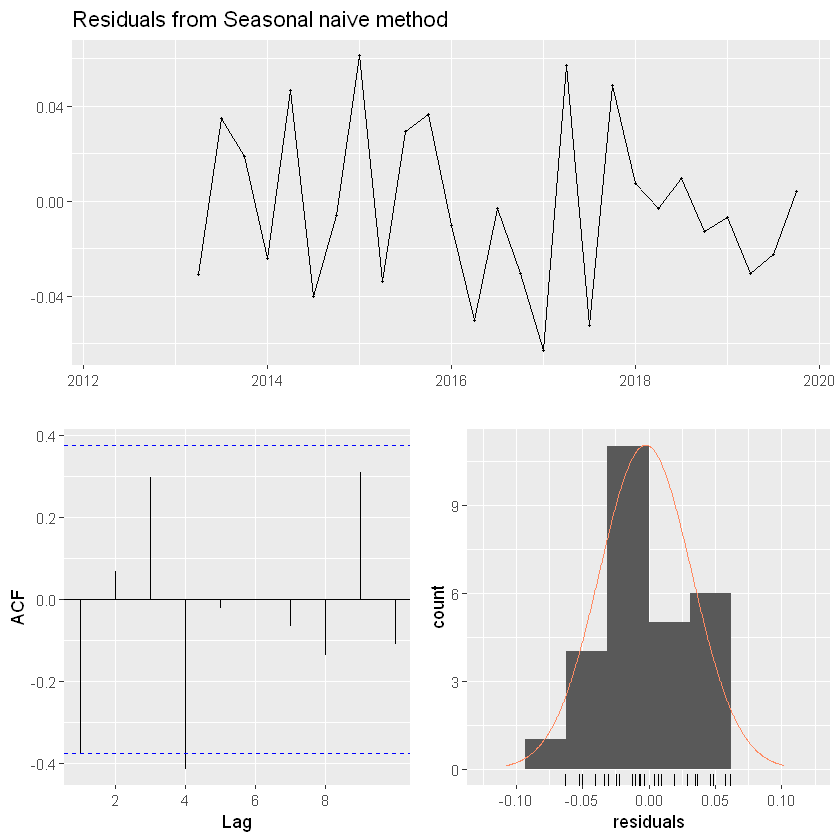

In [50]:
fitLog <- snaive(DYLog) 
print(summary(fitLog))
checkresiduals(fitLog)

Residuals SD = 80.8587

In [58]:
fit

        Point Forecast      Lo 80     Hi 80       Lo 95     Hi 95
2020 Q1         -386.1  -489.7246 -282.4754  -544.58013 -227.6199
2020 Q2          995.1   891.4754 1098.7246   836.61987 1153.5801
2020 Q3          312.6   208.9754  416.2246   154.11987  471.0801
2020 Q4         -909.8 -1013.4246 -806.1754 -1068.28013 -751.3199
2021 Q1         -386.1  -532.6473 -239.5527  -610.22475 -161.9752
2021 Q2          995.1   848.5527 1141.6473   770.97525 1219.2248
2021 Q3          312.6   166.0527  459.1473    88.47525  536.7248
2021 Q4         -909.8 -1056.3473 -763.2527 -1133.92475 -685.6752

### FIT ETS Method

In [157]:
fit_ets <- ets(trips)

ETS(M,A,M) 

Call:
 ets(y = trips) 

  Smoothing parameters:
    alpha = 0.6696 
    beta  = 0.0119 
    gamma = 1e-04 

  Initial states:
    l = 1534.679 
    b = 42.6526 
    s = 0.8794 1.2604 1.1155 0.7447

  sigma:  0.0269

     AIC     AICc      BIC 
378.8267 387.0085 392.0183 

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set -7.22914 54.69822 44.54334 -0.3013343 2.017642 0.2906987
                    ACF1
Training set -0.05187753
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set -7.22914 54.69822 44.54334 -0.3013343 2.017642 0.2906987
                    ACF1
Training set -0.05187753

	Ljung-Box test

data:  Residuals from ETS(M,A,M)
Q* = 3.1329, df = 3, p-value = 0.3716

Model df: 8.   Total lags used: 11



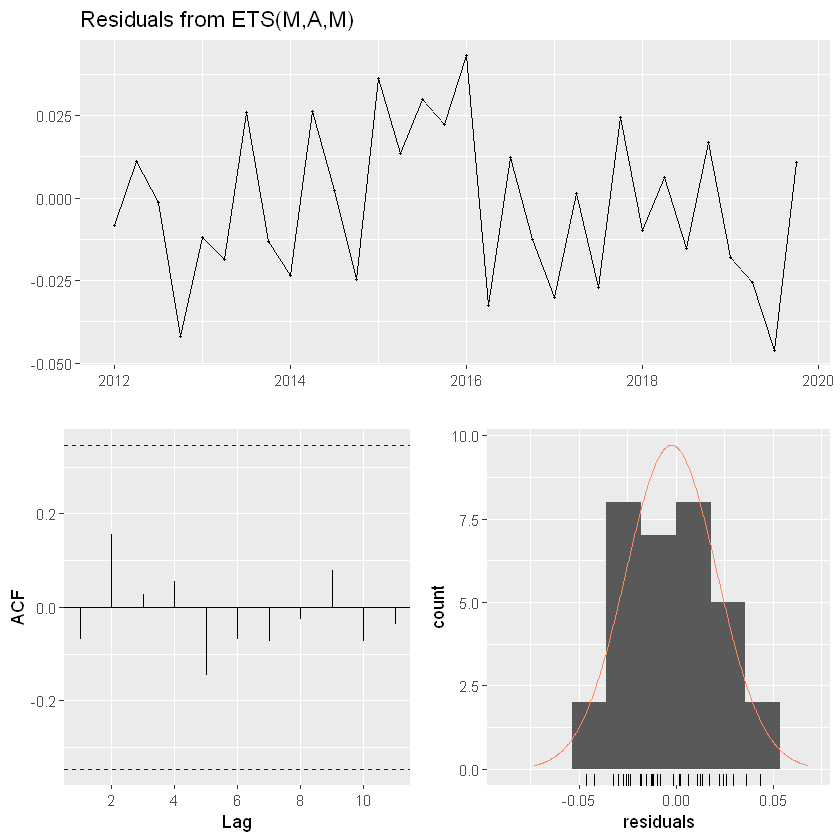

In [158]:
print(summary(fit_ets))
checkresiduals(fit_ets)
              

### FIT an ARIMA

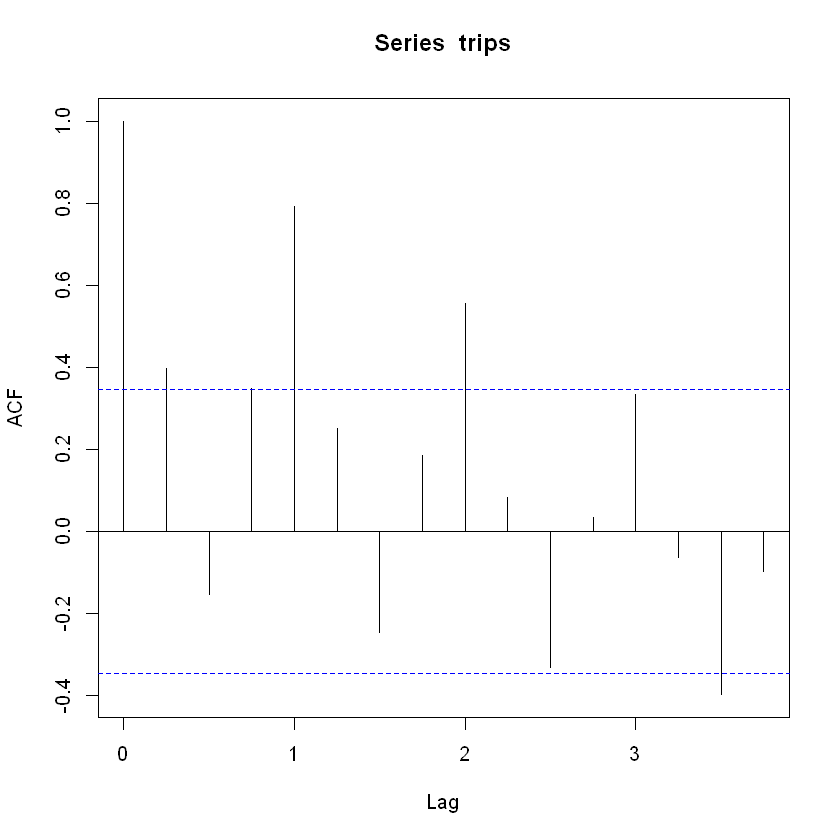

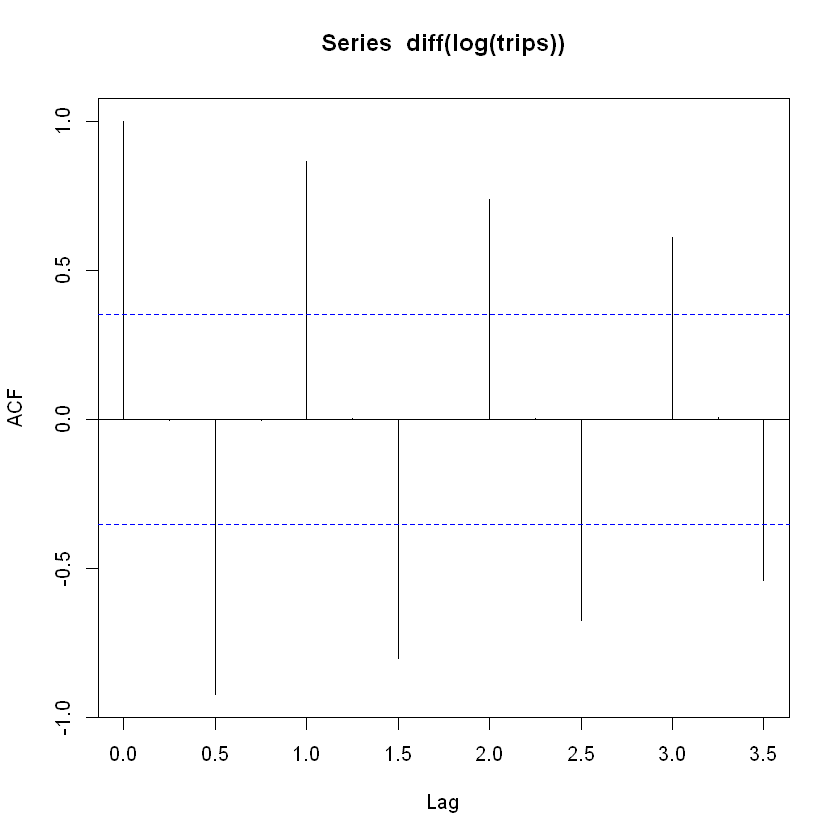

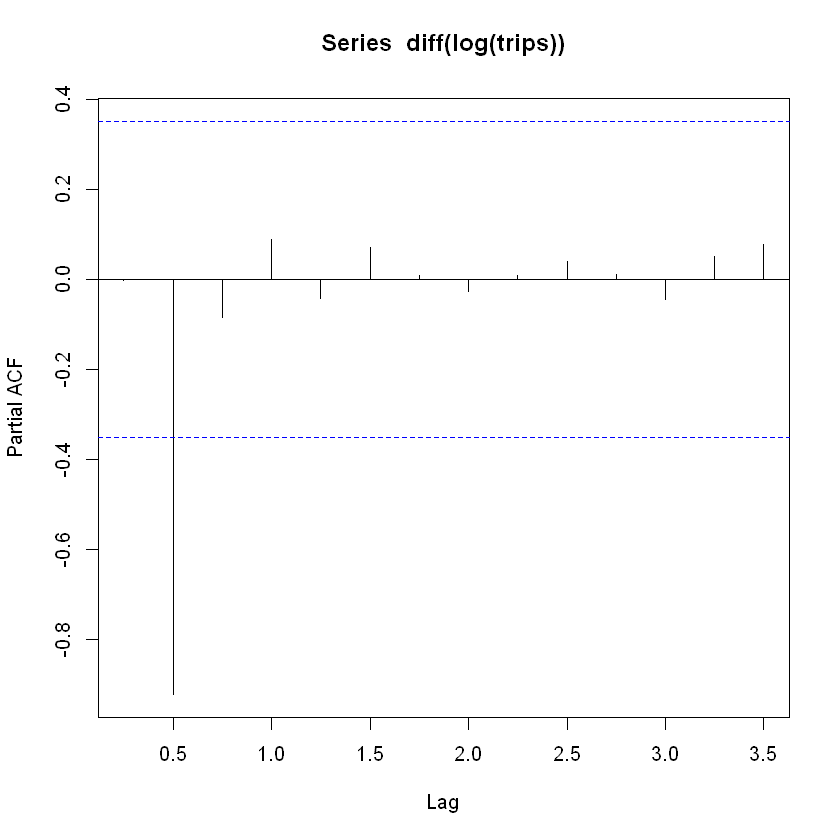

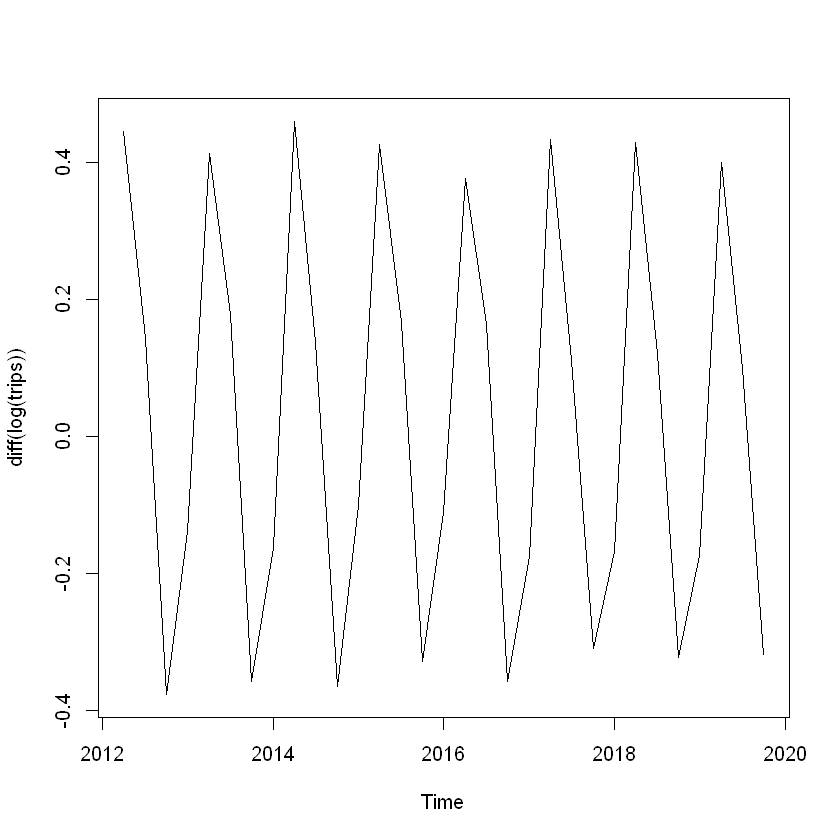

In [159]:
acf(trips)
acf(diff(log(trips)))
pacf(diff(log(trips)))
plot(diff(log(trips)))


 ARIMA(0,1,0)(0,1,0)[4]                    : -103.3878
 ARIMA(0,1,0)(0,1,1)[4]                    : -108.0205
 ARIMA(0,1,0)(0,1,2)[4]                    : -105.6066
 ARIMA(0,1,0)(1,1,0)[4]                    : -106.1052
 ARIMA(0,1,0)(1,1,1)[4]                    : -105.5464
 ARIMA(0,1,0)(1,1,2)[4]                    : Inf
 ARIMA(0,1,0)(2,1,0)[4]                    : -106.792
 ARIMA(0,1,0)(2,1,1)[4]                    : -104.5201
 ARIMA(0,1,0)(2,1,2)[4]                    : Inf
 ARIMA(0,1,1)(0,1,0)[4]                    : -104.4739
 ARIMA(0,1,1)(0,1,1)[4]                    : -108.3743
 ARIMA(0,1,1)(0,1,2)[4]                    : -105.7771
 ARIMA(0,1,1)(1,1,0)[4]                    : -107.0122
 ARIMA(0,1,1)(1,1,1)[4]                    : -105.7109
 ARIMA(0,1,1)(1,1,2)[4]                    : Inf
 ARIMA(0,1,1)(2,1,0)[4]                    : -106.5111
 ARIMA(0,1,1)(2,1,1)[4]                    : -103.8479
 ARIMA(0,1,1)(2,1,2)[4]                    : Inf
 ARIMA(0,1,2)(0,1,0)[4]           

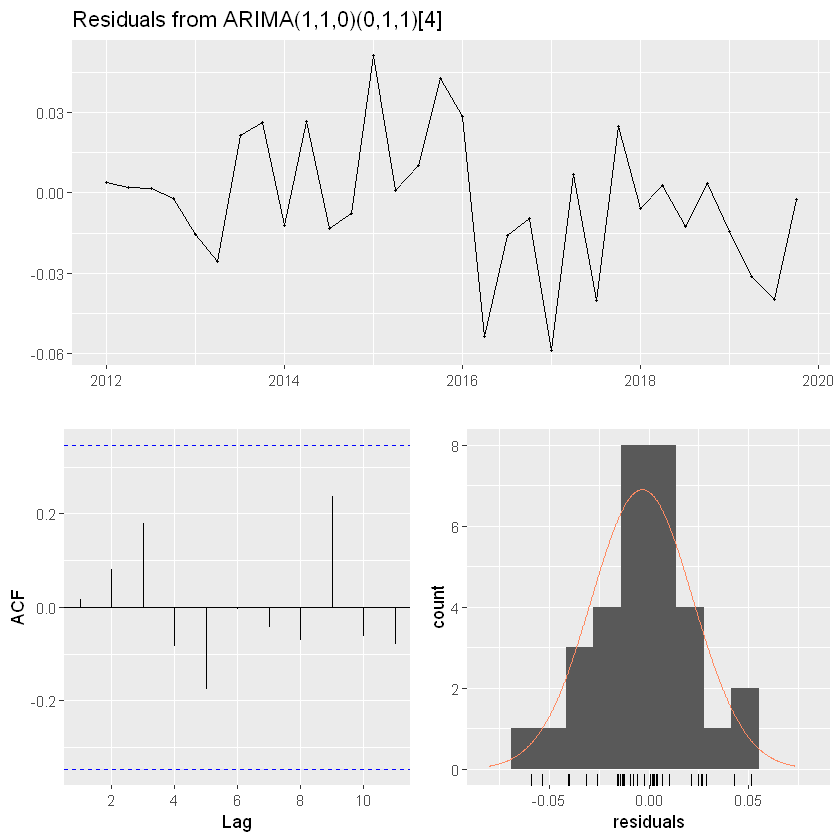

In [160]:
fit_arima_log <- auto.arima(log(trips), d=1, D=1, stepwise=FALSE, approximation=FALSE, trace=TRUE )
print(summary(fit_arima_log))
checkresiduals(fit_arima_log)

In [161]:
fit_arima <- auto.arima(trips, d=1, D=1, stepwise=FALSE, approximation=FALSE, trace=TRUE) 


 ARIMA(0,1,0)(0,1,0)[4]                    : 315.9887
 ARIMA(0,1,0)(0,1,1)[4]                    : 317.7796
 ARIMA(0,1,0)(0,1,2)[4]                    : 318.6819
 ARIMA(0,1,0)(1,1,0)[4]                    : 317.62
 ARIMA(0,1,0)(1,1,1)[4]                    : 320.0879
 ARIMA(0,1,0)(1,1,2)[4]                    : 319.64
 ARIMA(0,1,0)(2,1,0)[4]                    : 319.8007
 ARIMA(0,1,0)(2,1,1)[4]                    : Inf
 ARIMA(0,1,0)(2,1,2)[4]                    : Inf
 ARIMA(0,1,1)(0,1,0)[4]                    : 315.4824
 ARIMA(0,1,1)(0,1,1)[4]                    : 317.5143
 ARIMA(0,1,1)(0,1,2)[4]                    : 318.142
 ARIMA(0,1,1)(1,1,0)[4]                    : 317.3272
 ARIMA(0,1,1)(1,1,1)[4]                    : 319.9583
 ARIMA(0,1,1)(1,1,2)[4]                    : 319.528
 ARIMA(0,1,1)(2,1,0)[4]                    : 319.4374
 ARIMA(0,1,1)(2,1,1)[4]                    : 321.1285
 ARIMA(0,1,1)(2,1,2)[4]                    : Inf
 ARIMA(0,1,2)(0,1,0)[4]                    : 318

Series: trips 
ARIMA(0,1,1)(0,1,0)[4] 

Coefficients:
          ma1
      -0.3294
s.e.   0.1848

sigma^2 estimated as 6085:  log likelihood=-155.49
AIC=314.98   AICc=315.48   BIC=317.57

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -3.227264 70.31281 53.43007 -0.2903749 2.370922 0.3486952
                    ACF1
Training set -0.01268497
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -3.227264 70.31281 53.43007 -0.2903749 2.370922 0.3486952
                    ACF1
Training set -0.01268497

	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,1,0)[4]
Q* = 6.0507, df = 5, p-value = 0.3013

Model df: 1.   Total lags used: 6



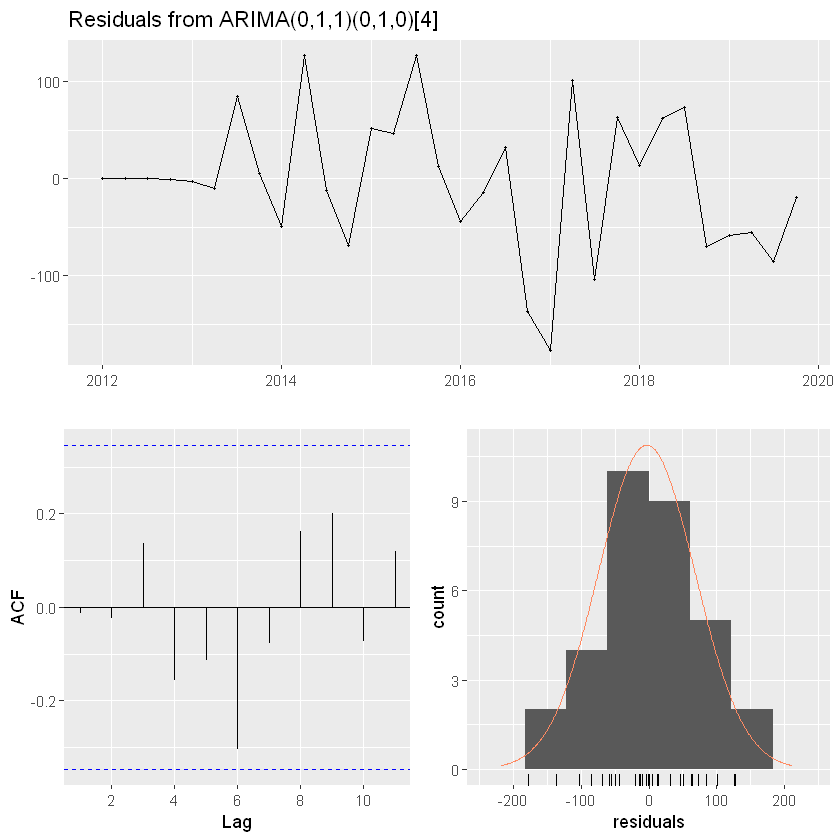

In [162]:

print(summary(fit_arima))
checkresiduals(fit_arima)

In [163]:
sqrt(6085)

[1] 78.00641

In [36]:
## Lets FORECAST

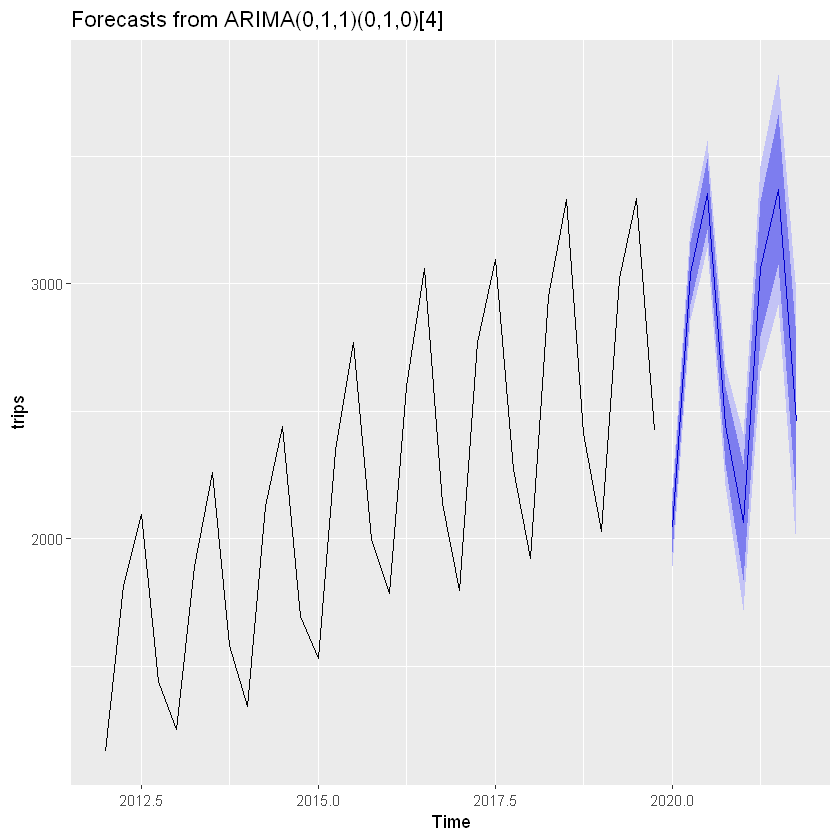

In [164]:
fcst <- forecast(fit_arima, h=8)
autoplot(fcst)

We can say that it make sense. Visualy inspecting, it capturing the seasonal patter, looks lke data is going to keep growing. 

In [165]:
summary(fcst)


Forecast method: ARIMA(0,1,1)(0,1,0)[4]

Model Information:
Series: trips 
ARIMA(0,1,1)(0,1,0)[4] 

Coefficients:
          ma1
      -0.3294
s.e.   0.1848

sigma^2 estimated as 6085:  log likelihood=-155.49
AIC=314.98   AICc=315.48   BIC=317.57

Error measures:
                    ME     RMSE      MAE        MPE     MAPE      MASE
Training set -3.227264 70.31281 53.43007 -0.2903749 2.370922 0.3486952
                    ACF1
Training set -0.01268497

Forecasts:
        Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
2020 Q1       2044.954 1944.986 2144.921 1892.067 2197.841
2020 Q2       3040.054 2919.691 3160.417 2855.975 3224.133
2020 Q3       3352.654 3214.883 3490.425 3141.951 3563.357
2020 Q4       2442.854 2289.640 2596.068 2208.533 2677.175
2021 Q1       2063.208 1836.570 2289.845 1716.596 2409.819
2021 Q2       3058.308 2794.984 3321.631 2655.589 3461.026
2021 Q3       3370.908 3075.418 3666.397 2918.996 3822.820
2021 Q4       2461.108 2136.625 2785.590 1964.855 2957.361
